# Data Exploration

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# load data
train_data = pd.read_csv("data/dengue_features_train.csv")
train_label = pd.read_csv("data/dengue_labels_train.csv")
test_data = pd.read_csv("data/dengue_features_test.csv")

In [28]:
train_data.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8  

[5 rows x 24 columns]

In [29]:
train_label.head()

city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

## Check city and date range

In [30]:
train_data["city"].value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [31]:
test_data["city"].value_counts()

sj    260
iq    156
Name: city, dtype: int64

In [32]:
train_data["week_start_date"] = pd.to_datetime(train_data["week_start_date"])
train_data_sj = train_data.loc[train_data["city"]=="sj",:]
train_data_iq = train_data.loc[train_data["city"]=="iq",:]

In [33]:
test_data["week_start_date"] = pd.to_datetime(test_data["week_start_date"])
test_data_sj = test_data.loc[test_data["city"]=="sj",:]
test_data_iq = test_data.loc[test_data["city"]=="iq",:]

In [34]:
train_label_sj = train_label.loc[train_label["city"]=="sj",:]
train_label_iq = train_label.loc[train_label["city"]=="iq",:]

In [35]:
# check the early and latest date in train data
print("SJ - train early date: {}".format(train_data_sj["week_start_date"].min()))
print("SJ - train latest date: {}".format(train_data_sj["week_start_date"].max()))
print("IQ - train early date: {}".format(train_data_iq["week_start_date"].min()))
print("IQ - train latest date: {}".format(train_data_iq["week_start_date"].max()))

SJ - train early date: 1990-04-30 00:00:00
SJ - train latest date: 2008-04-22 00:00:00
IQ - train early date: 2000-07-01 00:00:00
IQ - train latest date: 2010-06-25 00:00:00


In [36]:
# check the early and latest date in train data
print("SJ - test early date: {}".format(test_data_sj["week_start_date"].min()))
print("SJ - test latest date: {}".format(test_data_sj["week_start_date"].max()))
print("IQ - test early date: {}".format(test_data_iq["week_start_date"].min()))
print("IQ - test latest date: {}".format(test_data_iq["week_start_date"].max()))

SJ - test early date: 2008-04-29 00:00:00
SJ - test latest date: 2013-04-23 00:00:00
IQ - test early date: 2010-07-02 00:00:00
IQ - test latest date: 2013-06-25 00:00:00


## Check missing rate

In [29]:
print("Check missing rate in train - sj")
total_obs = train_data_sj.shape[0]
for column in train_data_sj.columns:
    print(" Column name: {},   Missing rate: {}".format(column,
                                                      round(sum(train_data_sj[column].isna())/ total_obs,3)))

Check missing rate in train - sj
 Column name: city,   Missing rate: 0.0
 Column name: year,   Missing rate: 0.0
 Column name: weekofyear,   Missing rate: 0.0
 Column name: week_start_date,   Missing rate: 0.0
 Column name: ndvi_ne,   Missing rate: 0.204
 Column name: ndvi_nw,   Missing rate: 0.052
 Column name: ndvi_se,   Missing rate: 0.02
 Column name: ndvi_sw,   Missing rate: 0.02
 Column name: precipitation_amt_mm,   Missing rate: 0.01
 Column name: reanalysis_air_temp_k,   Missing rate: 0.006
 Column name: reanalysis_avg_temp_k,   Missing rate: 0.006
 Column name: reanalysis_dew_point_temp_k,   Missing rate: 0.006
 Column name: reanalysis_max_air_temp_k,   Missing rate: 0.006
 Column name: reanalysis_min_air_temp_k,   Missing rate: 0.006
 Column name: reanalysis_precip_amt_kg_per_m2,   Missing rate: 0.006
 Column name: reanalysis_relative_humidity_percent,   Missing rate: 0.006
 Column name: reanalysis_sat_precip_amt_mm,   Missing rate: 0.01
 Column name: reanalysis_specific_humi

<AxesSubplot:>

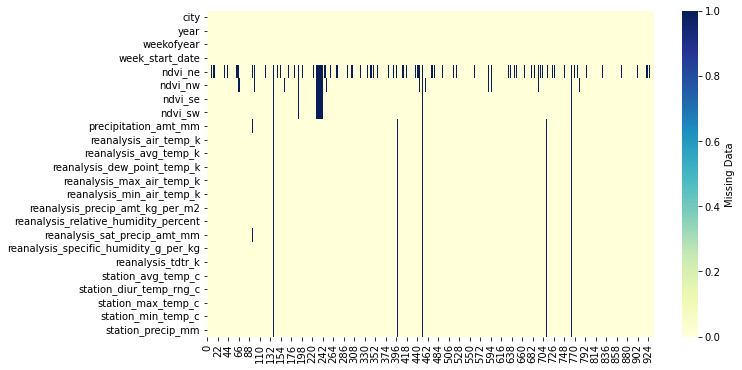

In [161]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data_sj.isna().transpose(),
           cmap = "YlGnBu",
           cbar_kws={'label':'Missing Data'})

In [30]:
print("Check missing rate in train - iq")
total_obs = train_data_iq.shape[0]
for column in train_data_iq.columns:
    print(" Column name: {},   Missing rate: {}".format(column,
                                                      round(sum(train_data_iq[column].isna())/ total_obs,3)))

Check missing rate in train - iq
 Column name: city,   Missing rate: 0.0
 Column name: year,   Missing rate: 0.0
 Column name: weekofyear,   Missing rate: 0.0
 Column name: week_start_date,   Missing rate: 0.0
 Column name: ndvi_ne,   Missing rate: 0.006
 Column name: ndvi_nw,   Missing rate: 0.006
 Column name: ndvi_se,   Missing rate: 0.006
 Column name: ndvi_sw,   Missing rate: 0.006
 Column name: precipitation_amt_mm,   Missing rate: 0.008
 Column name: reanalysis_air_temp_k,   Missing rate: 0.008
 Column name: reanalysis_avg_temp_k,   Missing rate: 0.008
 Column name: reanalysis_dew_point_temp_k,   Missing rate: 0.008
 Column name: reanalysis_max_air_temp_k,   Missing rate: 0.008
 Column name: reanalysis_min_air_temp_k,   Missing rate: 0.008
 Column name: reanalysis_precip_amt_kg_per_m2,   Missing rate: 0.008
 Column name: reanalysis_relative_humidity_percent,   Missing rate: 0.008
 Column name: reanalysis_sat_precip_amt_mm,   Missing rate: 0.008
 Column name: reanalysis_specific_

<AxesSubplot:>

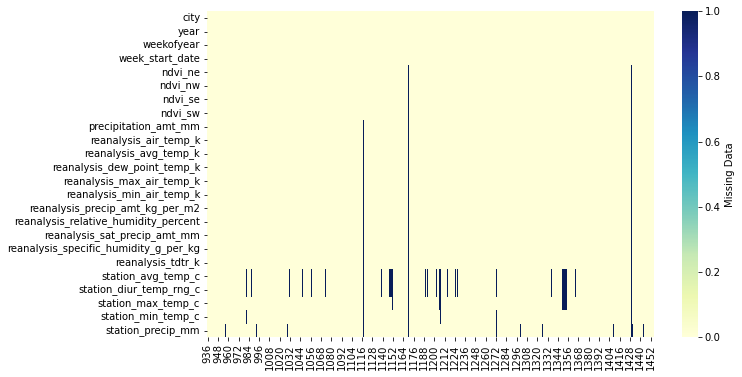

In [162]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data_iq.isna().transpose(),
           cmap = "YlGnBu",
           cbar_kws={'label':'Missing Data'})

In [32]:
print("Check missing rate in test - sj")
total_obs = test_data_sj.shape[0]
for column in test_data_sj.columns:
    print(" Column name: {},   Missing rate: {}".format(column,
                                                      round(sum(test_data_sj[column].isna())/ total_obs,3)))

Check missing rate in test - sj
 Column name: city,   Missing rate: 0.0
 Column name: year,   Missing rate: 0.0
 Column name: weekofyear,   Missing rate: 0.0
 Column name: week_start_date,   Missing rate: 0.0
 Column name: ndvi_ne,   Missing rate: 0.165
 Column name: ndvi_nw,   Missing rate: 0.042
 Column name: ndvi_se,   Missing rate: 0.004
 Column name: ndvi_sw,   Missing rate: 0.004
 Column name: precipitation_amt_mm,   Missing rate: 0.008
 Column name: reanalysis_air_temp_k,   Missing rate: 0.008
 Column name: reanalysis_avg_temp_k,   Missing rate: 0.008
 Column name: reanalysis_dew_point_temp_k,   Missing rate: 0.008
 Column name: reanalysis_max_air_temp_k,   Missing rate: 0.008
 Column name: reanalysis_min_air_temp_k,   Missing rate: 0.008
 Column name: reanalysis_precip_amt_kg_per_m2,   Missing rate: 0.008
 Column name: reanalysis_relative_humidity_percent,   Missing rate: 0.008
 Column name: reanalysis_sat_precip_amt_mm,   Missing rate: 0.008
 Column name: reanalysis_specific_h

<AxesSubplot:>

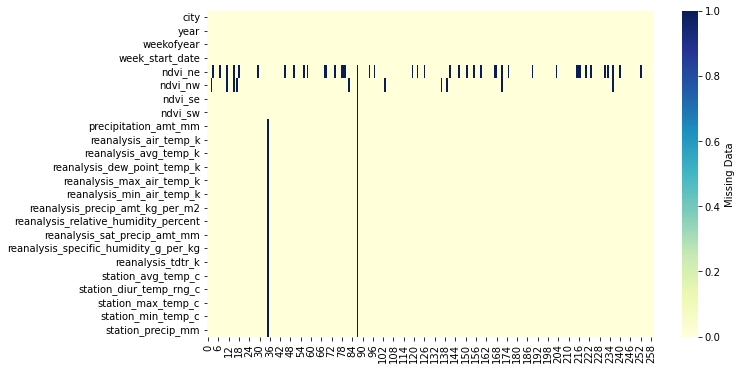

In [163]:
plt.figure(figsize=(10,6))
sns.heatmap(test_data_sj.isna().transpose(),
           cmap = "YlGnBu",
           cbar_kws={'label':'Missing Data'})

In [33]:
print("Check missing rate in test - iq")
total_obs = test_data_iq.shape[0]
for column in test_data_iq.columns:
    print(" Column name: {},   Missing rate: {}".format(column,
                                                      round(sum(test_data_iq[column].isna())/ total_obs,3)))

Check missing rate in test - iq
 Column name: city,   Missing rate: 0.0
 Column name: year,   Missing rate: 0.0
 Column name: weekofyear,   Missing rate: 0.0
 Column name: week_start_date,   Missing rate: 0.0
 Column name: ndvi_ne,   Missing rate: 0.0
 Column name: ndvi_nw,   Missing rate: 0.0
 Column name: ndvi_se,   Missing rate: 0.0
 Column name: ndvi_sw,   Missing rate: 0.0
 Column name: precipitation_amt_mm,   Missing rate: 0.0
 Column name: reanalysis_air_temp_k,   Missing rate: 0.0
 Column name: reanalysis_avg_temp_k,   Missing rate: 0.0
 Column name: reanalysis_dew_point_temp_k,   Missing rate: 0.0
 Column name: reanalysis_max_air_temp_k,   Missing rate: 0.0
 Column name: reanalysis_min_air_temp_k,   Missing rate: 0.0
 Column name: reanalysis_precip_amt_kg_per_m2,   Missing rate: 0.0
 Column name: reanalysis_relative_humidity_percent,   Missing rate: 0.0
 Column name: reanalysis_sat_precip_amt_mm,   Missing rate: 0.0
 Column name: reanalysis_specific_humidity_g_per_kg,   Missin

<AxesSubplot:>

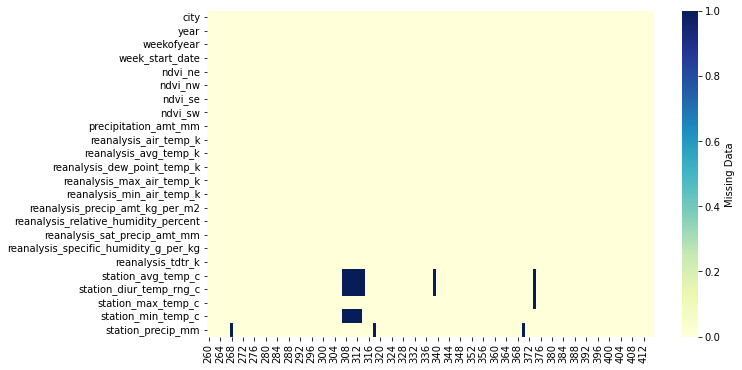

In [164]:
plt.figure(figsize=(10,6))
sns.heatmap(test_data_iq.isna().transpose(),
           cmap = "YlGnBu",
           cbar_kws={'label':'Missing Data'})

## Check feature value change throughout time

In [79]:
def featurevslabel_scatter(x_date, x_feature, y, figuresize = (16,4)):
    fig, ax = plt.subplots(ncols = 1,
                           figsize = figuresize)
    ax = sns.scatterplot(x = x_date, y = x_feature, color = 'blue')
    ax2 = ax.twinx()
    ax2 = sns.scatterplot(x = x_date, y = y , color = "red")
    ax.set_xlabel("record date", fontsize = 18)
    
    ax.set_ylabel(x_feature.name, color = "blue", fontsize = 18)
    ax2.set_ylabel(y.name, color = "red", fontsize = 18)
    
    return

def featurevsfeature_scatter(x1_date, x1_feature, x2_date, x2_feature, figuresize = (16,4)):
    fig, ax = plt.subplots(ncols = 1,
                           figsize = figuresize)
    ax = sns.scatterplot(x = x1_date, y = x1_feature, color = 'blue')
    ax2 = ax.twinx()
    ax2 = sns.scatterplot(x = x2_date, y = x2_feature , color = "red")
    ax.set_xlabel("record date", fontsize = 18)
    
    ax.set_ylabel(x1_feature.name, color = "blue", fontsize = 18)
    ax2.set_ylabel(x2_feature.name, color = "red", fontsize = 18)
    
    return

Feature value change throughout time in SJ train data


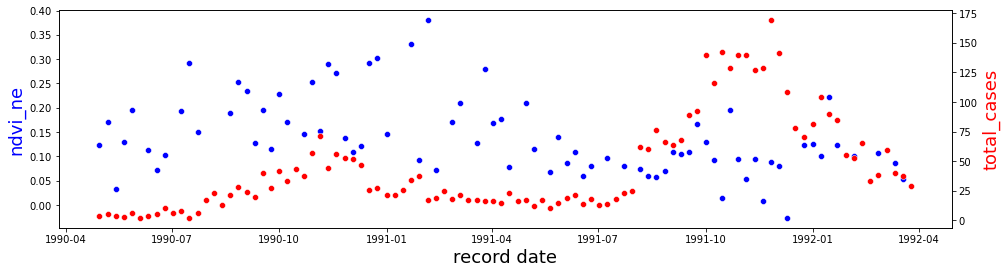

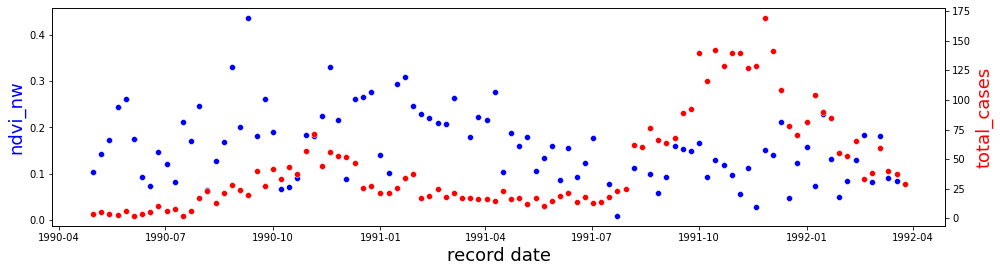

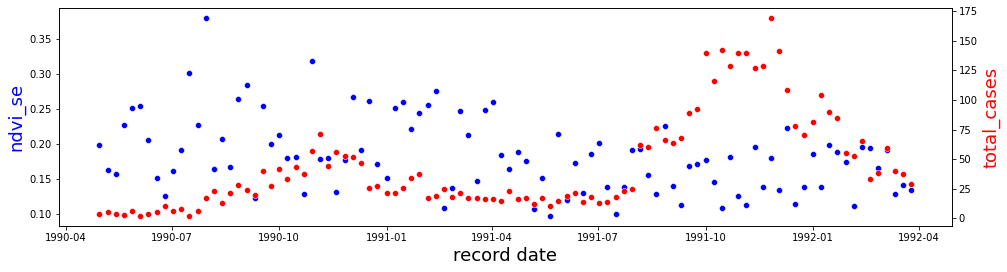

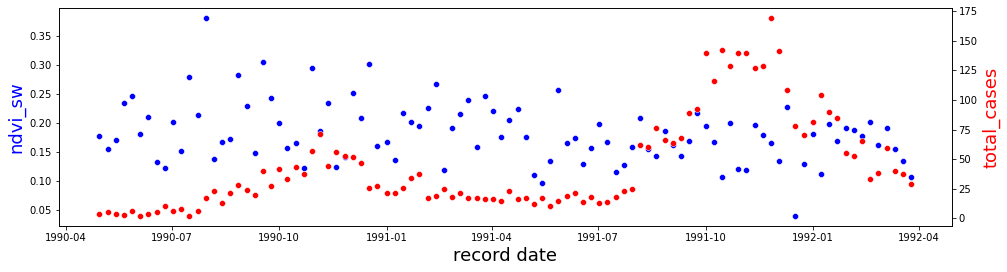

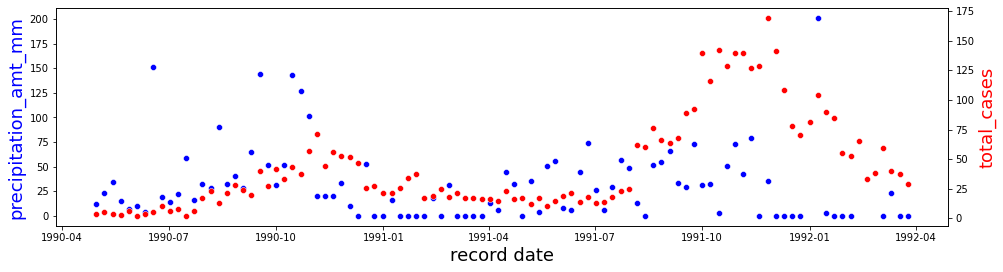

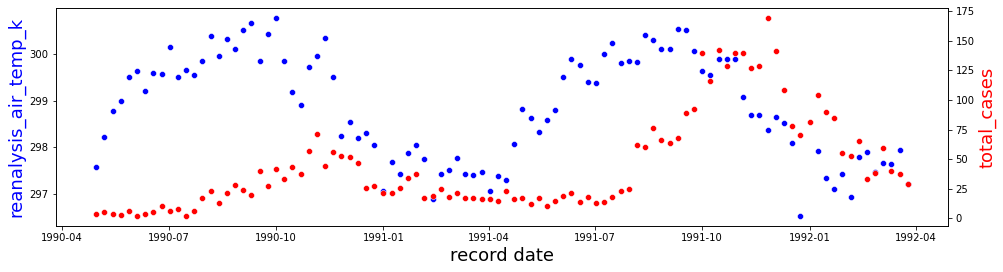

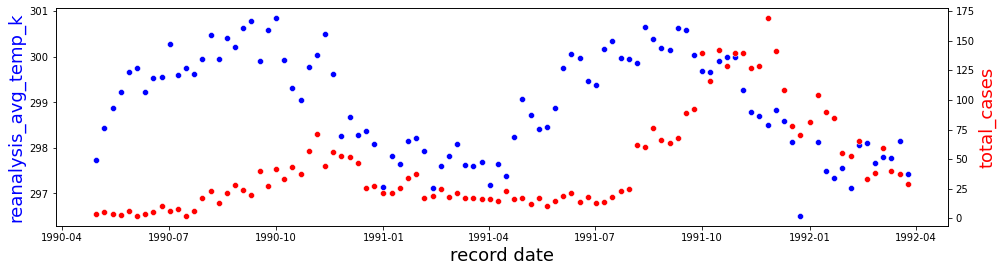

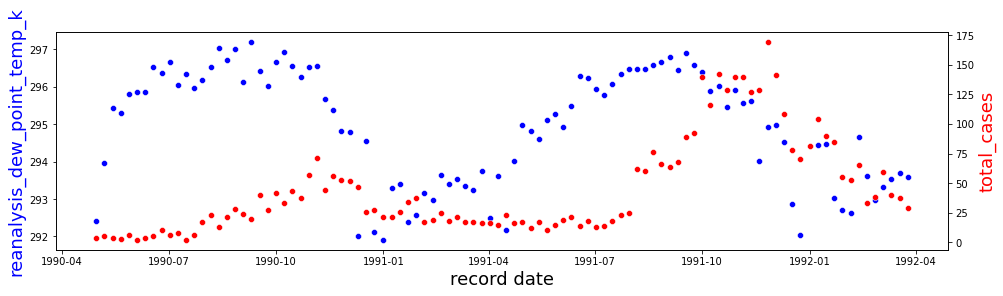

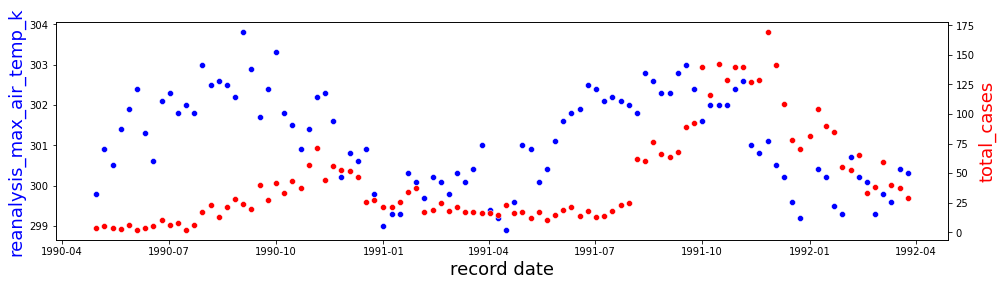

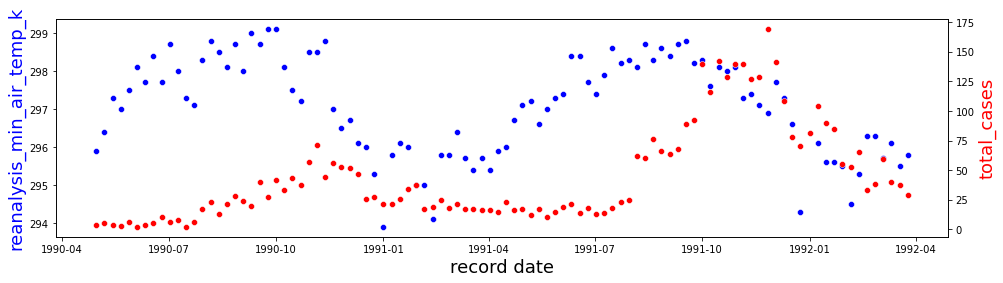

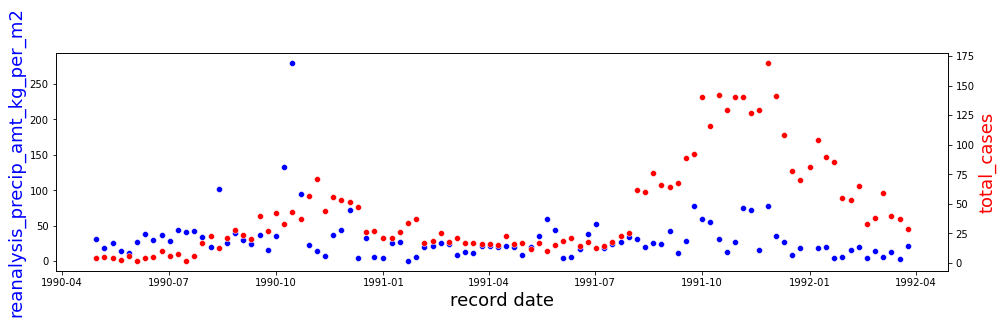

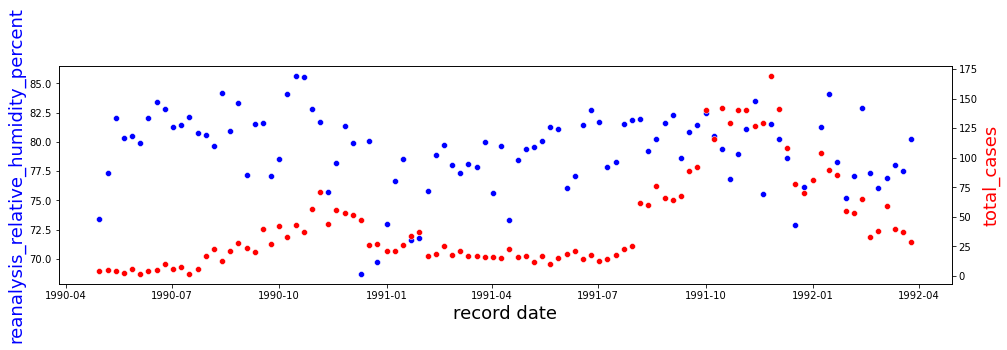

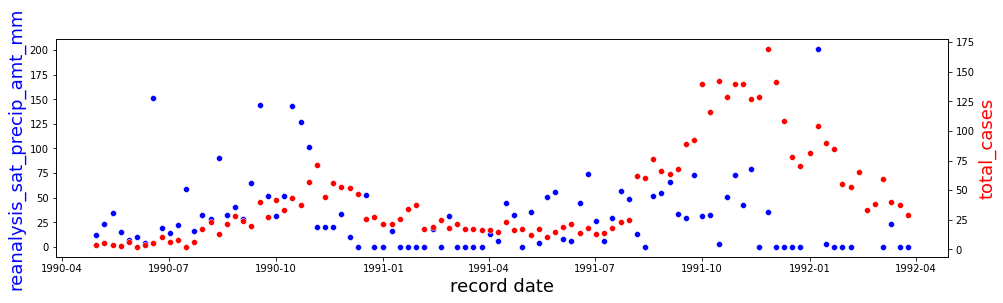

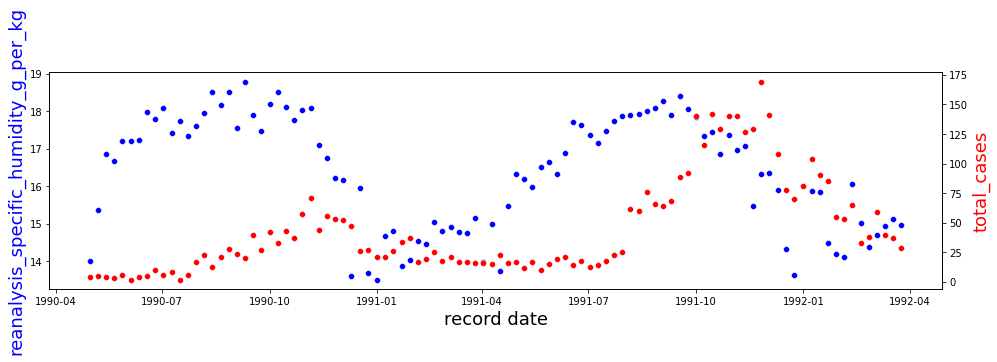

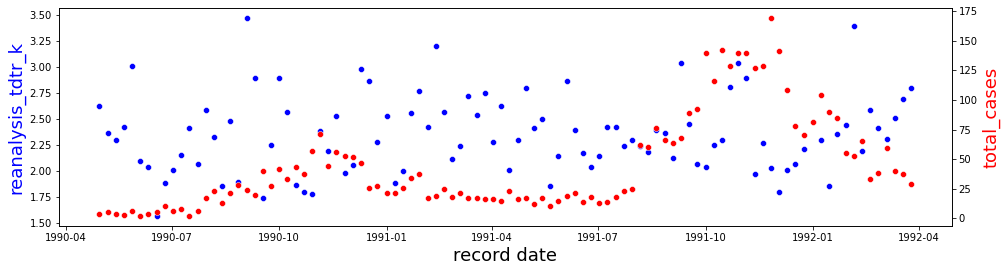

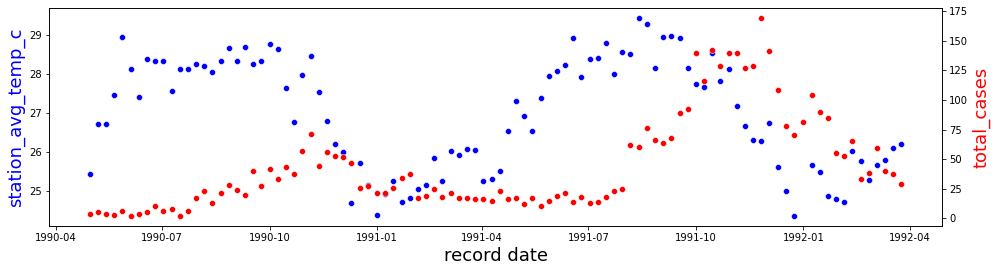

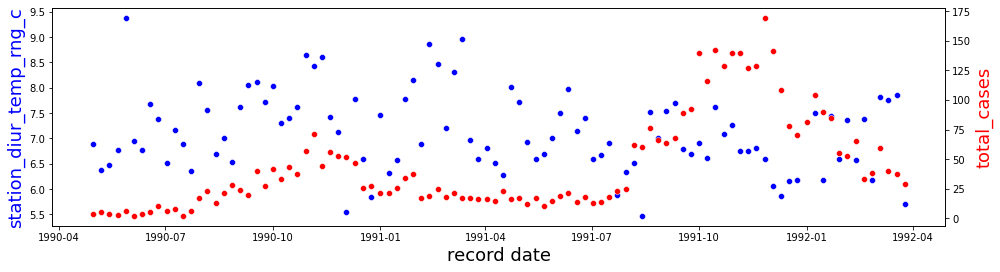

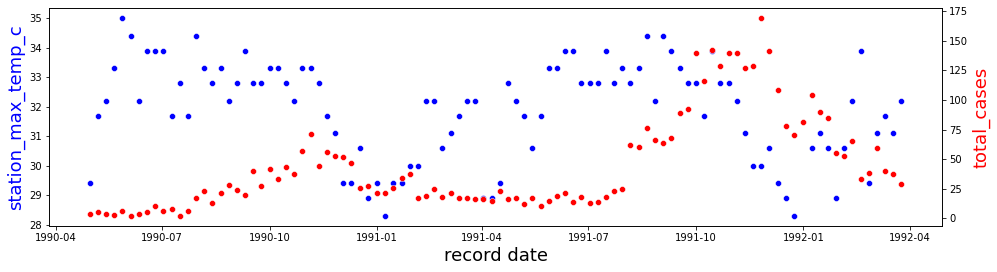

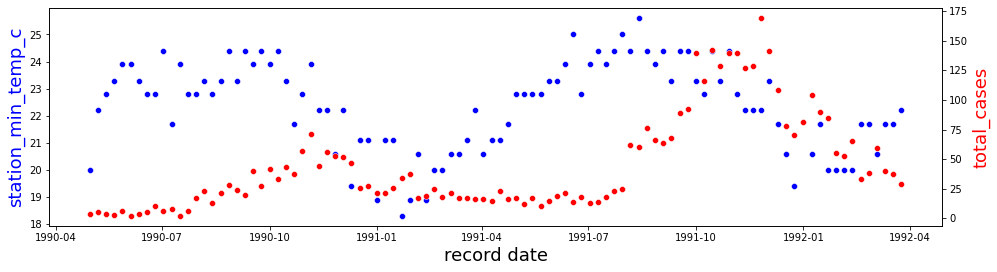

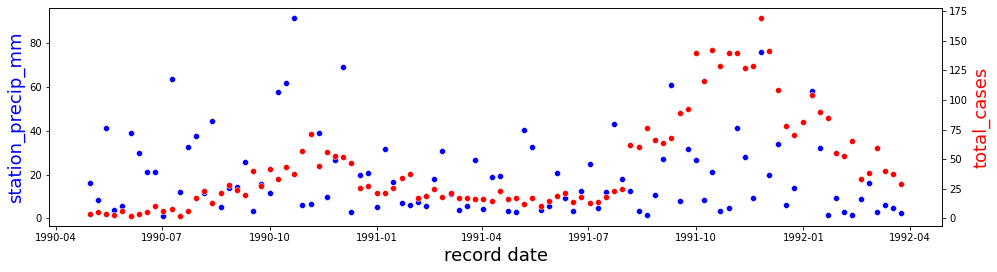

In [147]:
print("Feature value change throughout time in SJ train data")
for column in train_data_sj.columns[4:]:    
    featurevslabel_scatter(train_data_sj["week_start_date"][0:100], train_data_sj[column][0:100], train_label_sj["total_cases"][0:100])


Feature value change throughout time in SJ train data


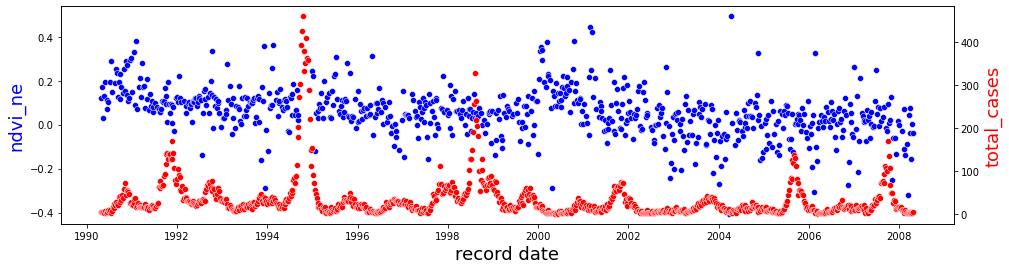

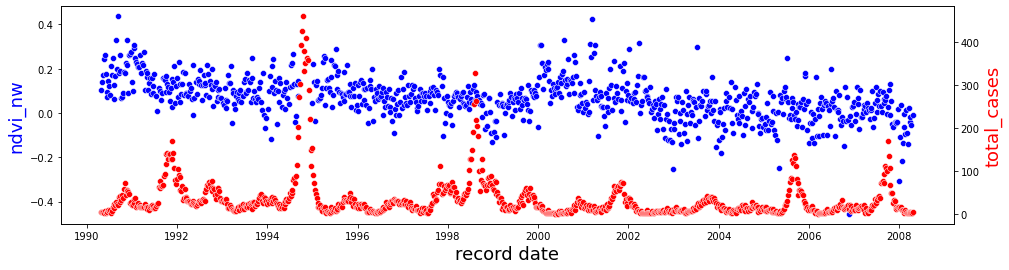

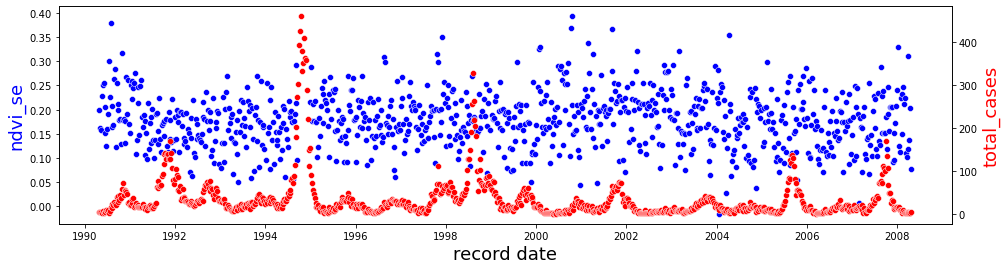

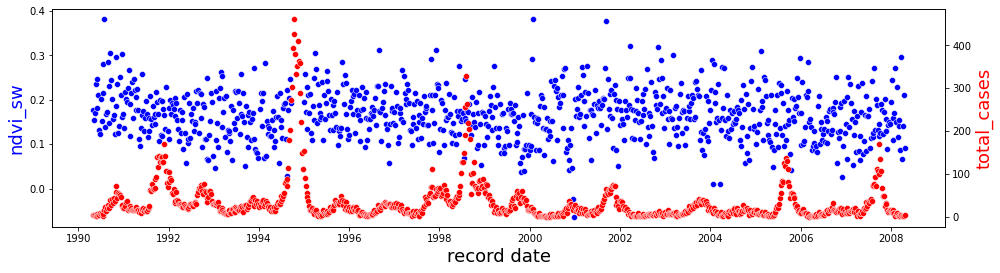

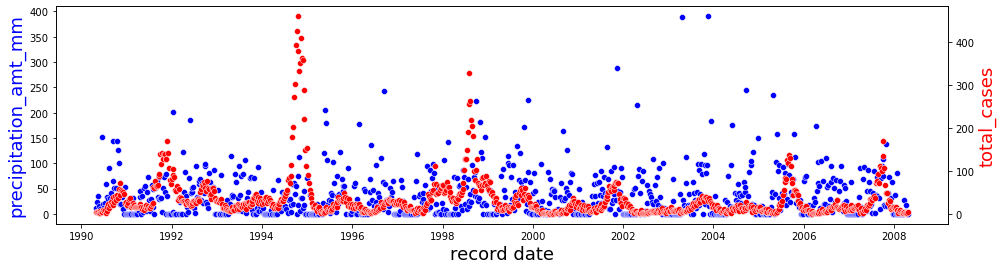

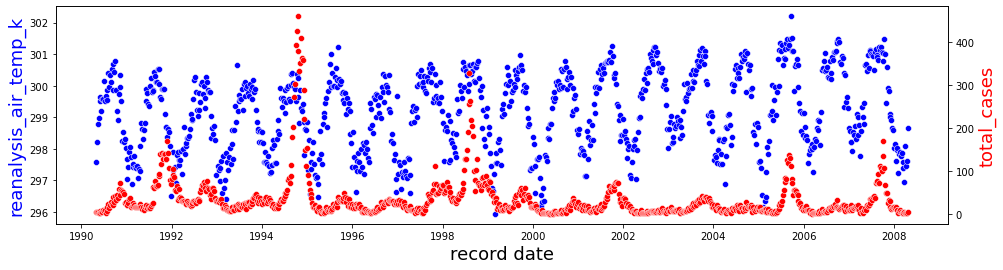

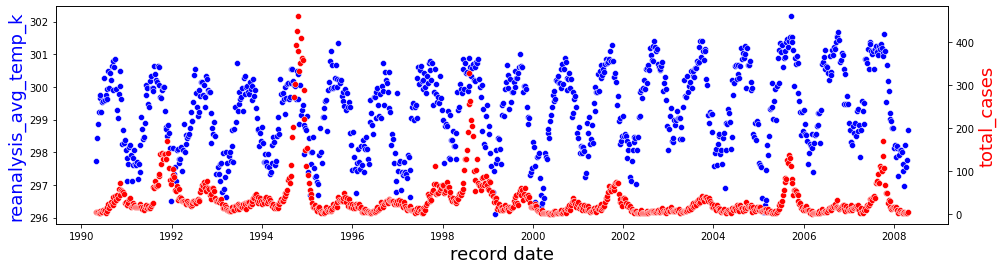

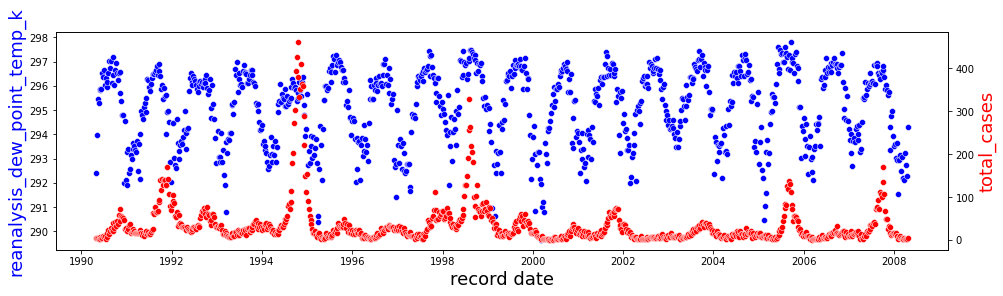

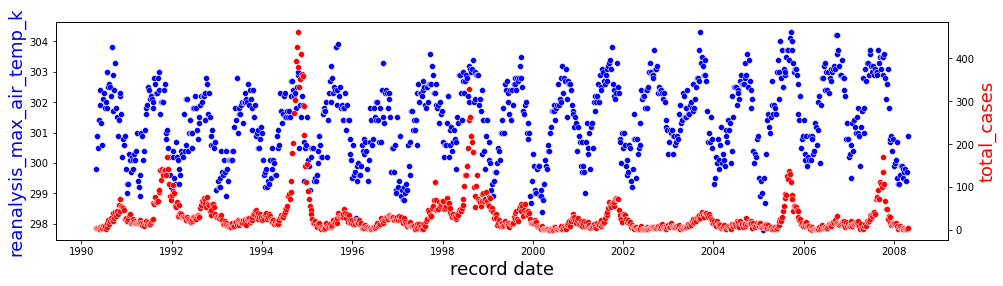

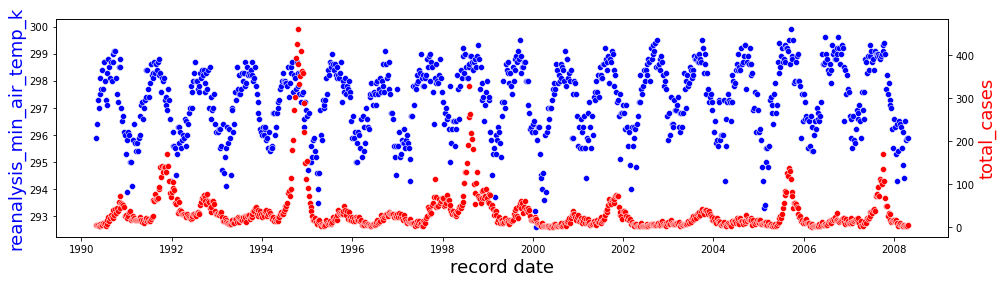

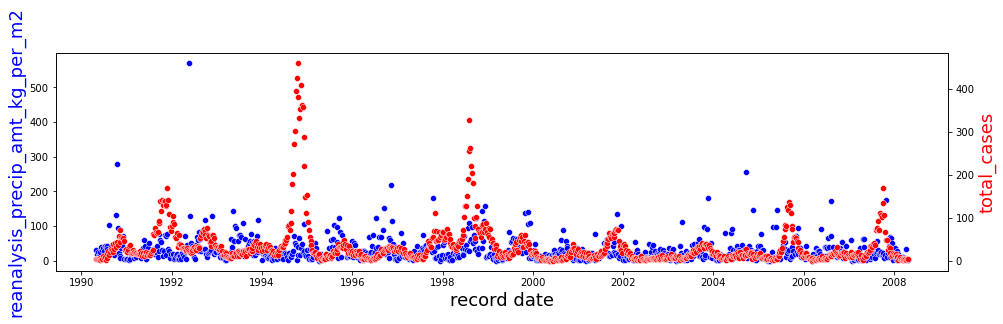

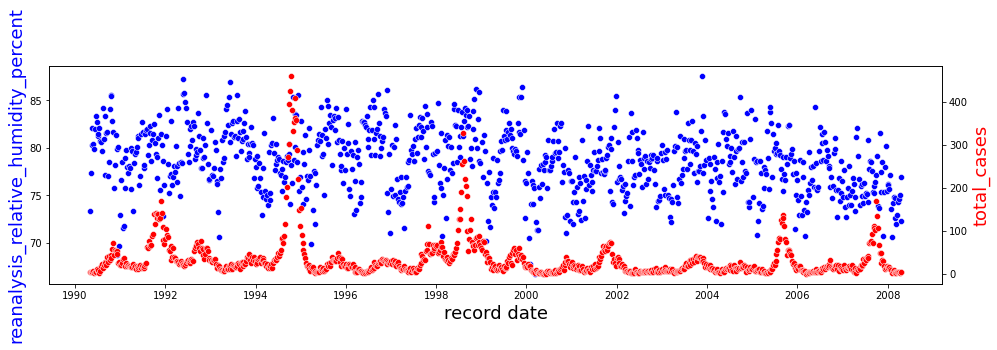

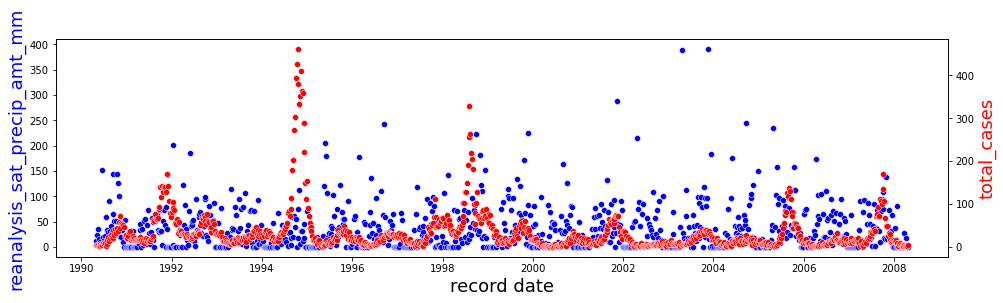

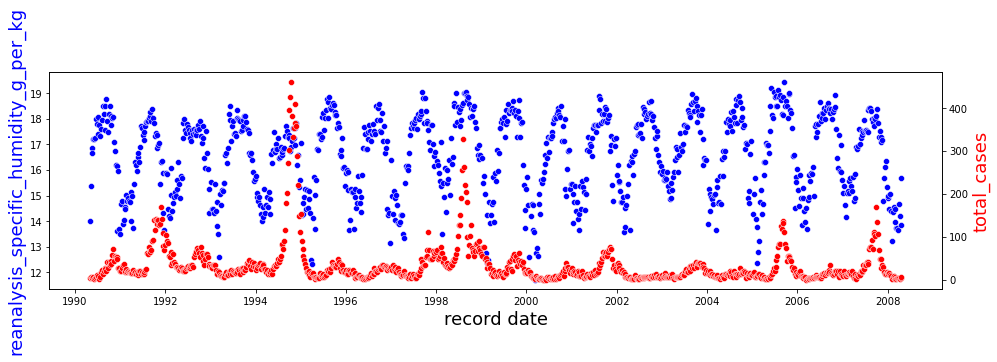

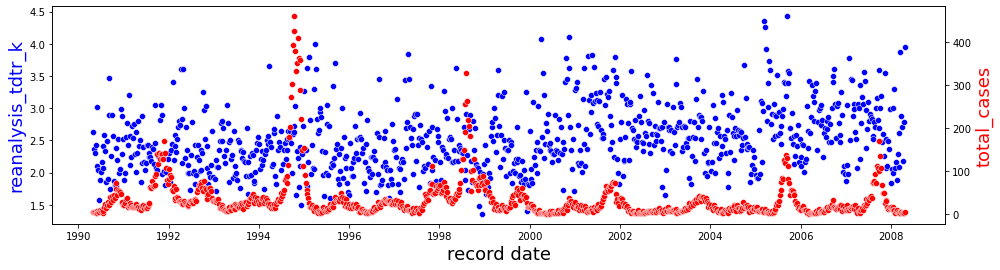

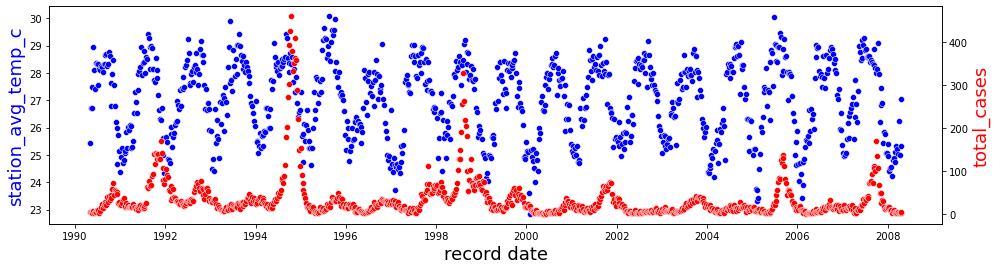

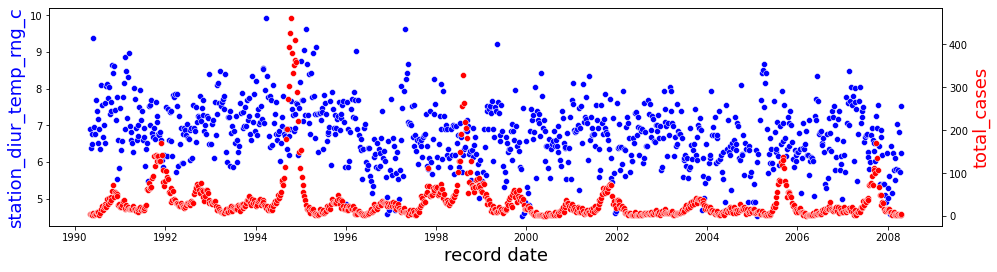

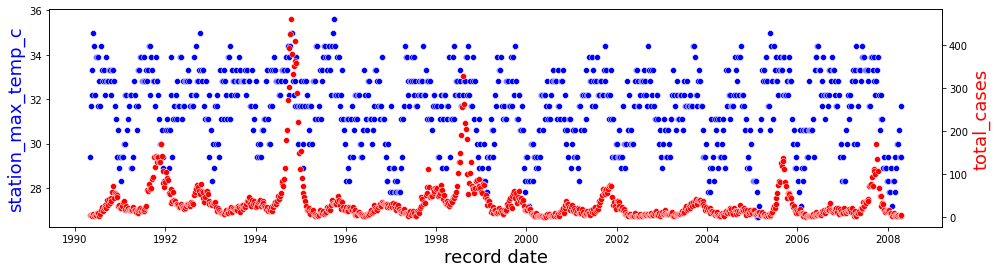

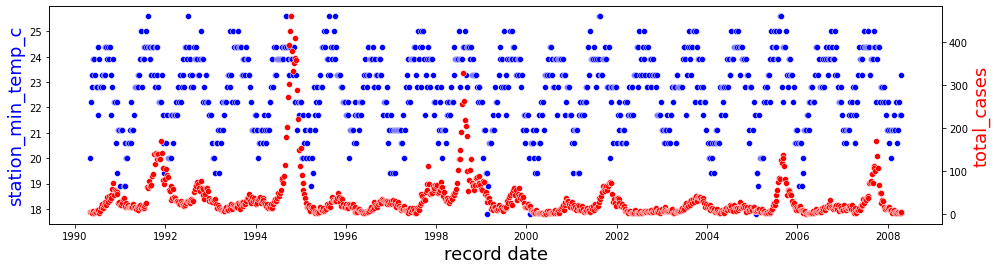

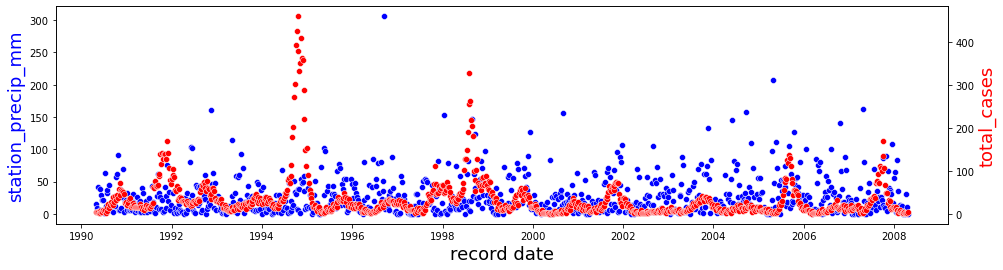

In [77]:
print("Feature value change throughout time in SJ train data")
for column in train_data_sj.columns[4:]:    
    featurevslabel_scatter(train_data_sj["week_start_date"], train_data_sj[column], train_label_sj["total_cases"])


Feature value change throughout time in IQ train data


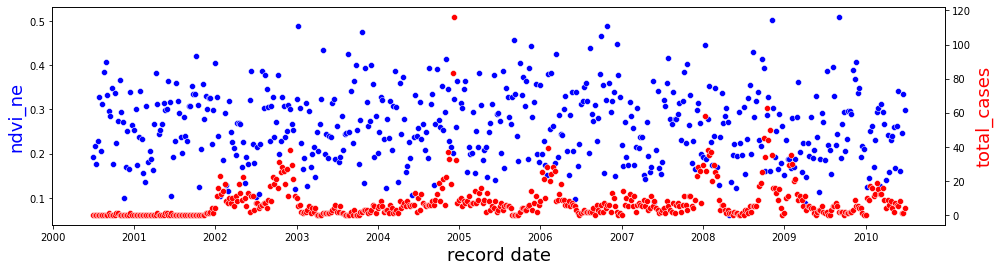

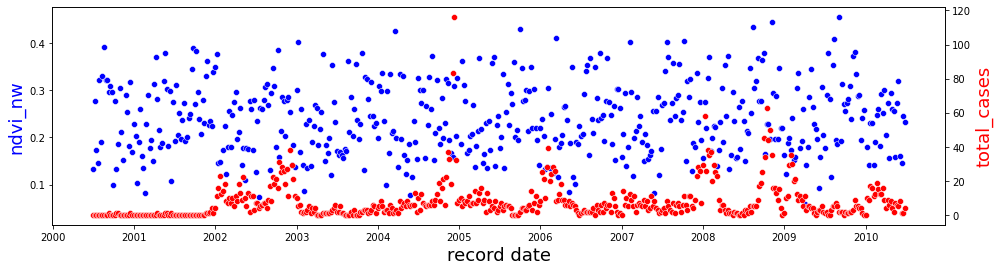

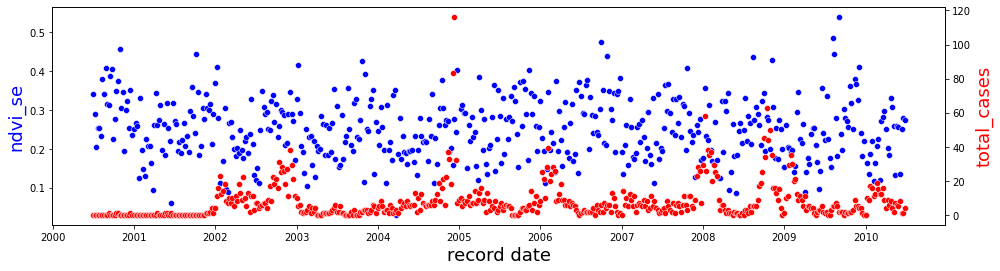

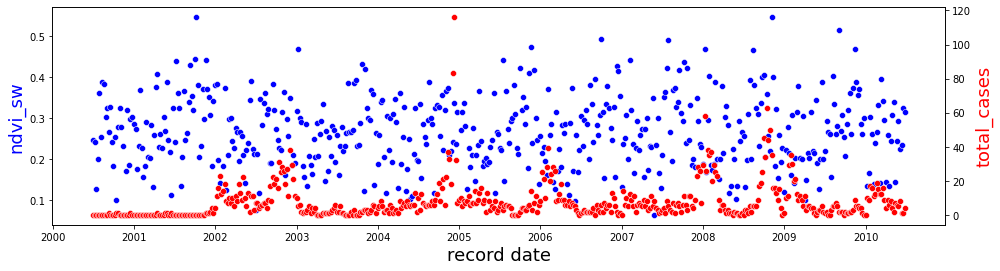

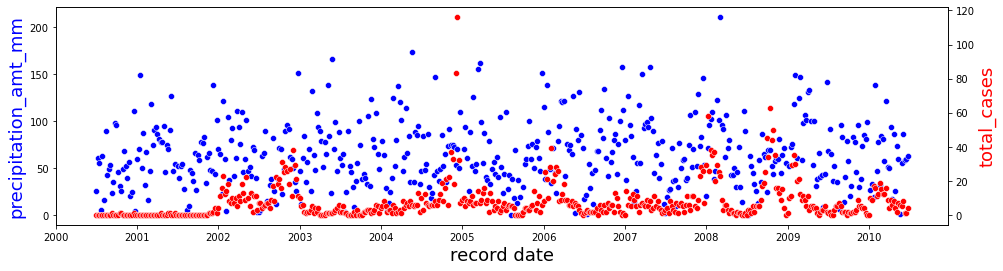

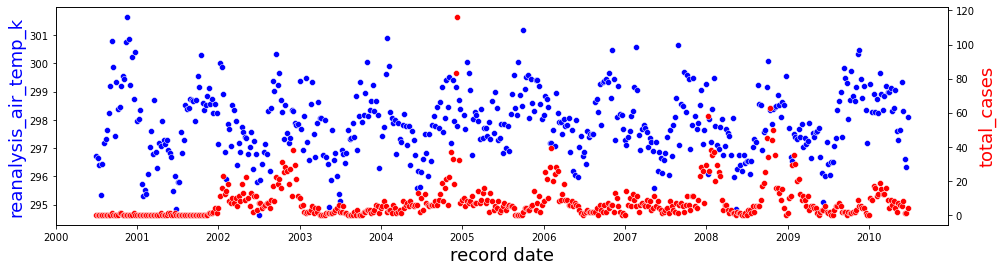

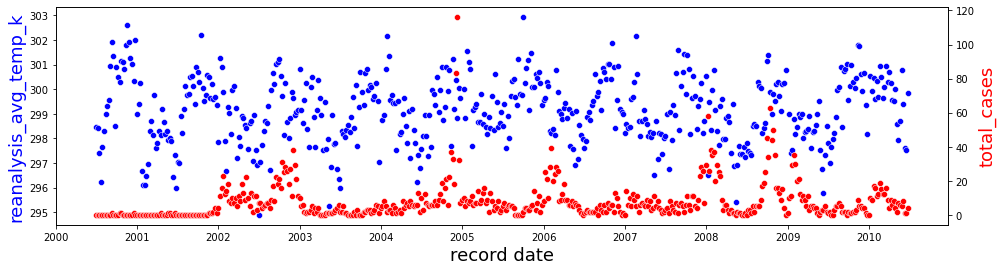

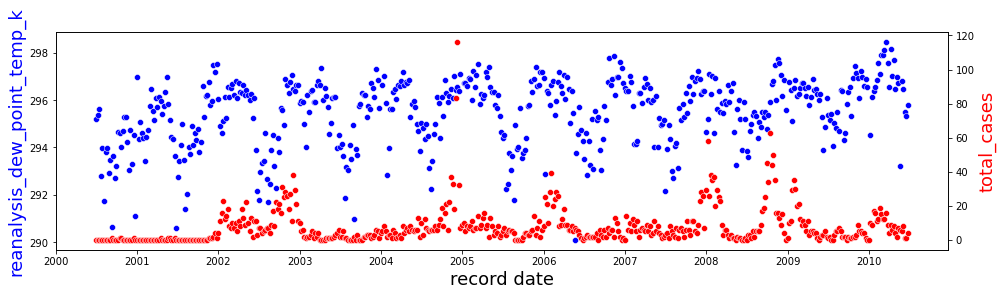

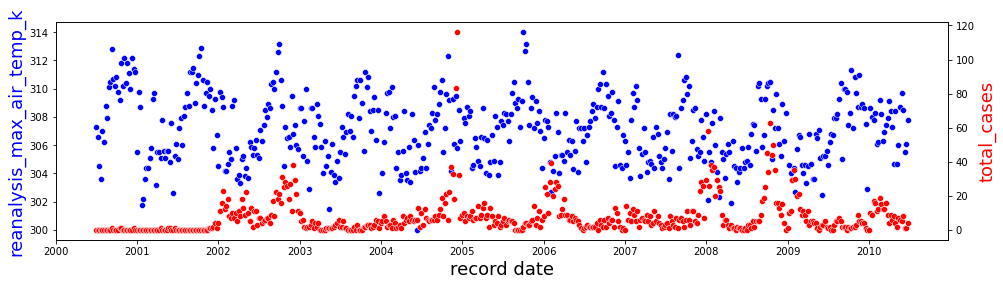

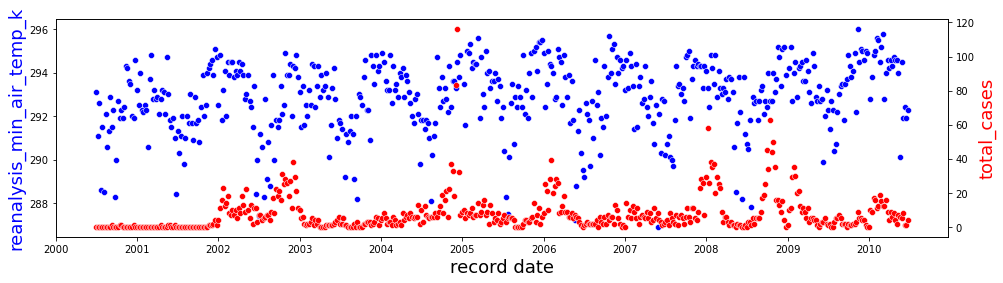

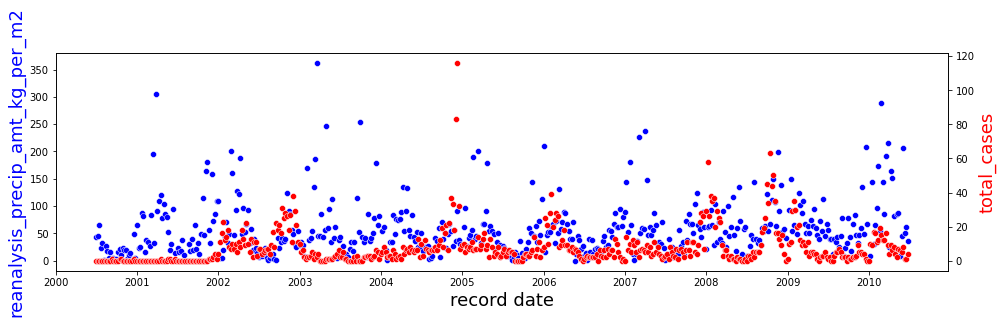

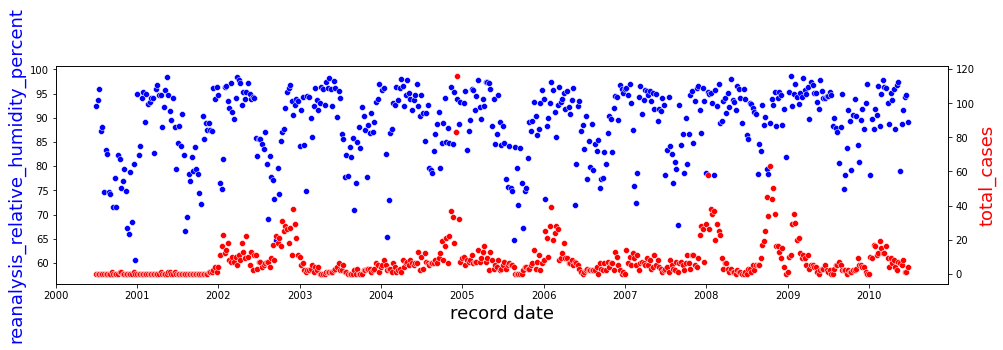

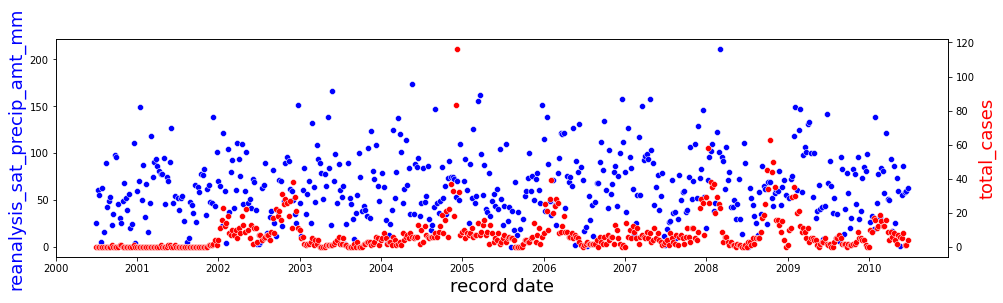

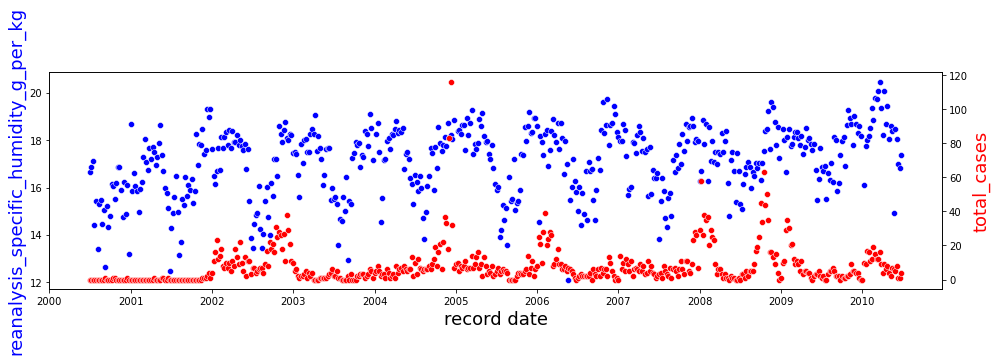

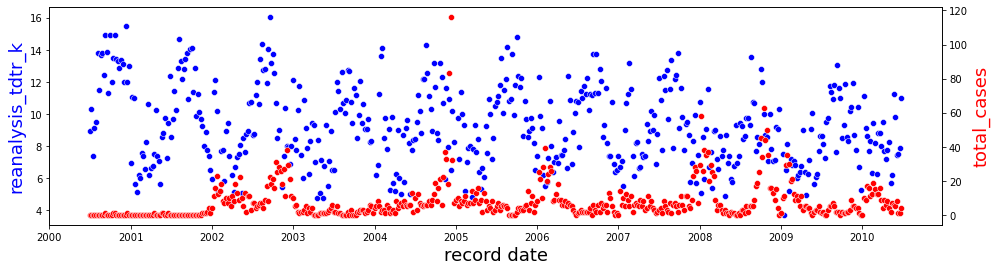

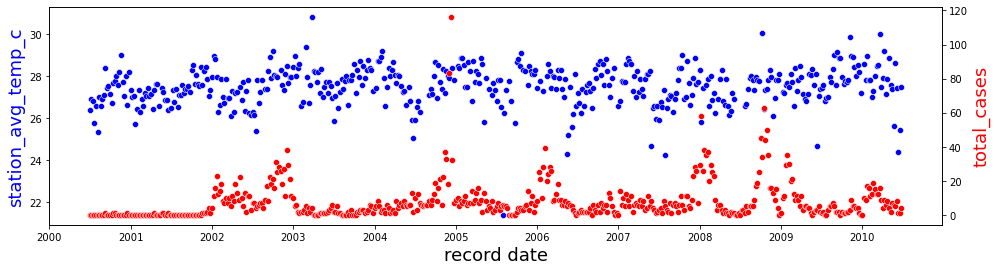

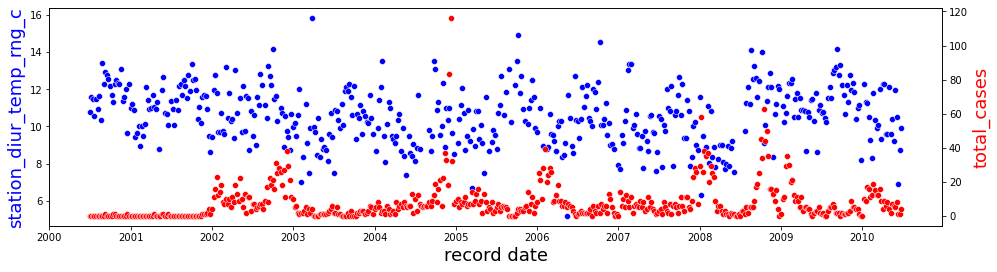

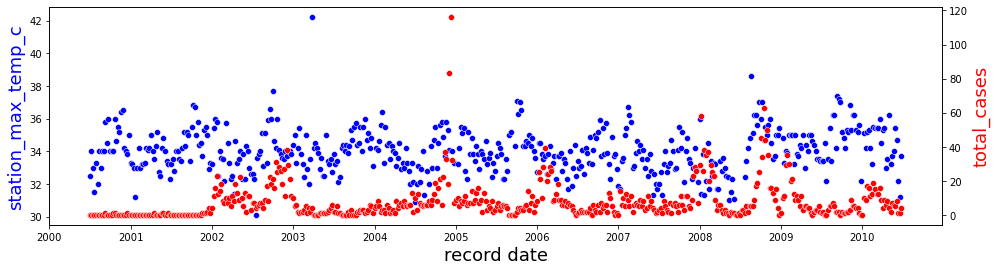

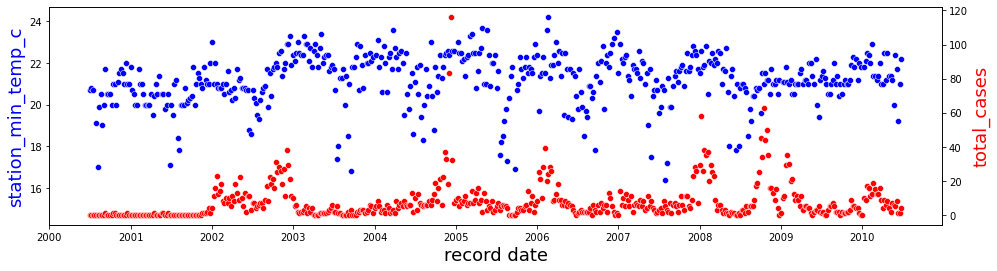

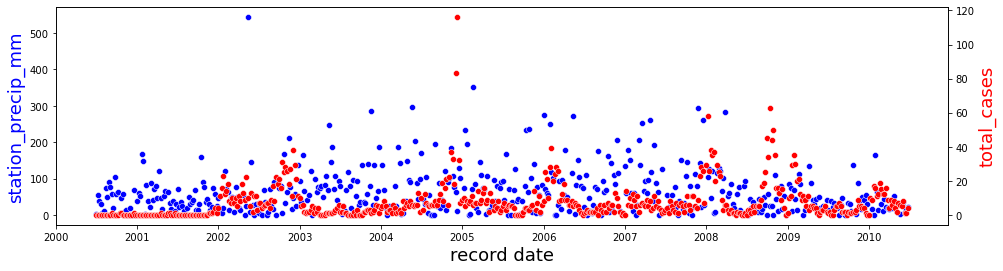

In [78]:
print("Feature value change throughout time in IQ train data")
for column in train_data_iq.columns[4:]:    
    featurevslabel_scatter(train_data_iq["week_start_date"], train_data_iq[column], train_label_iq["total_cases"])

Feature value change throughout time in SJ and IQ train data


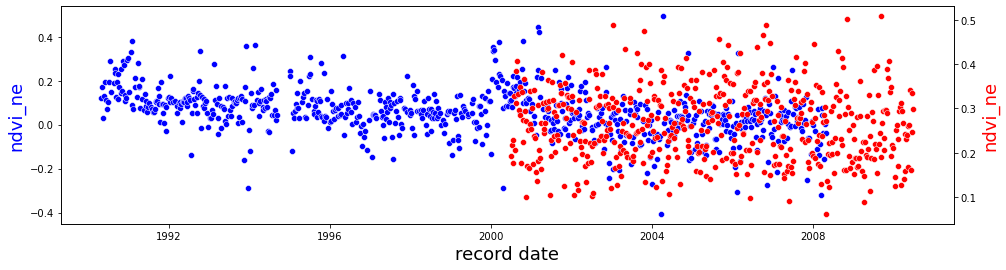

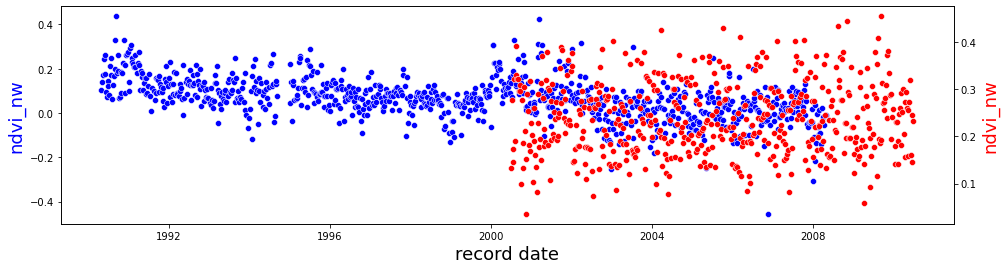

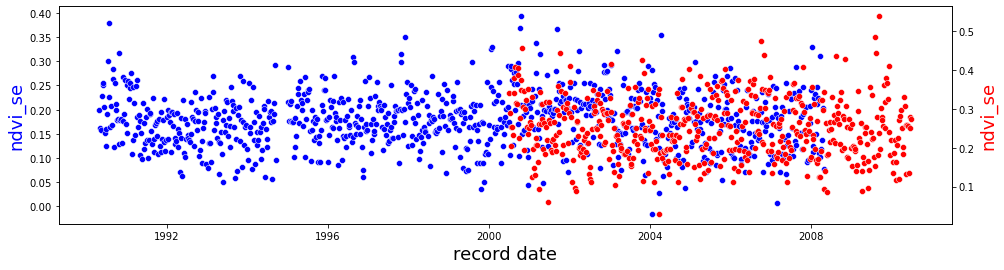

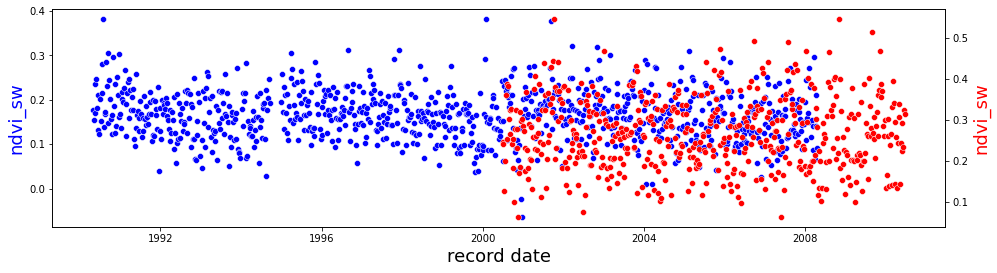

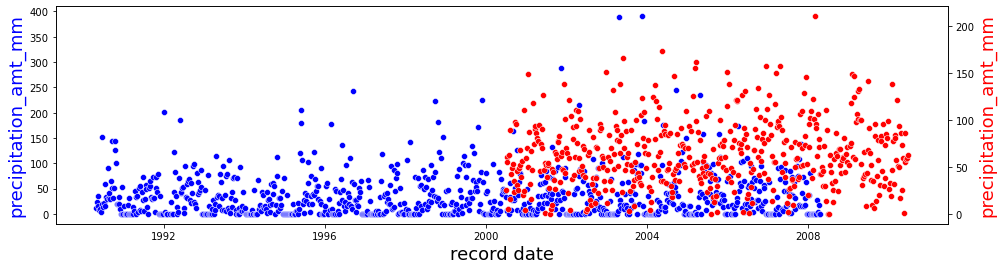

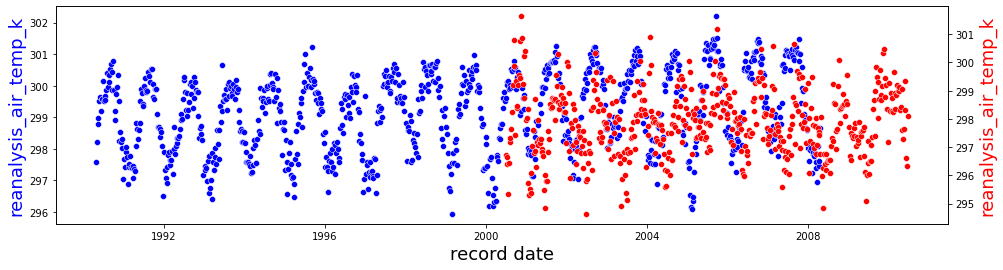

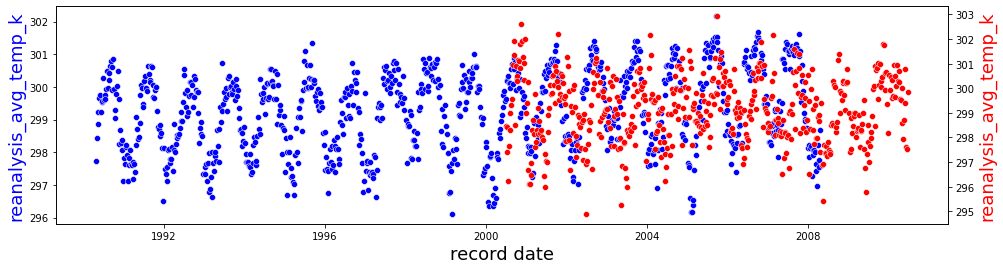

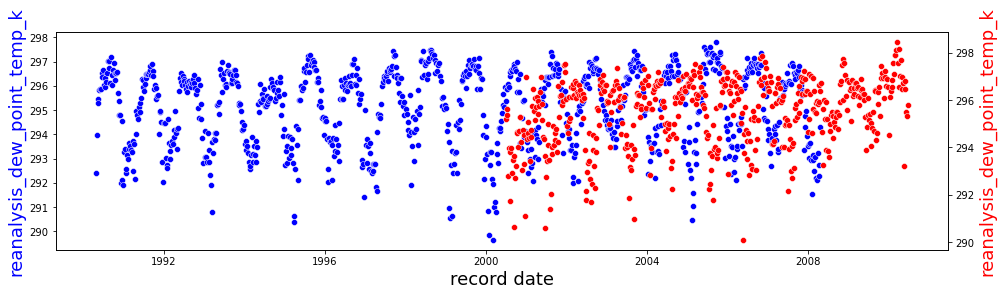

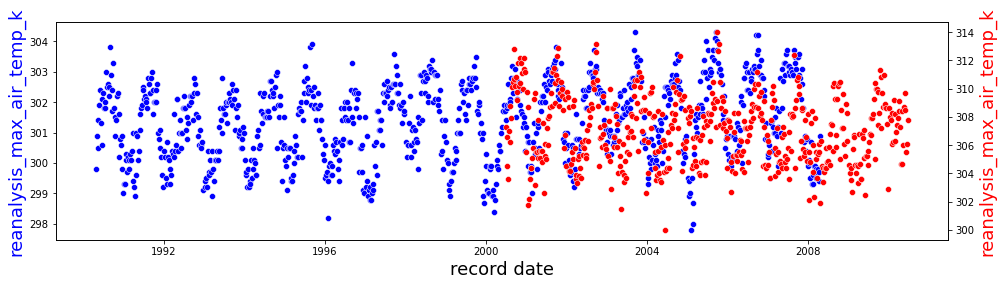

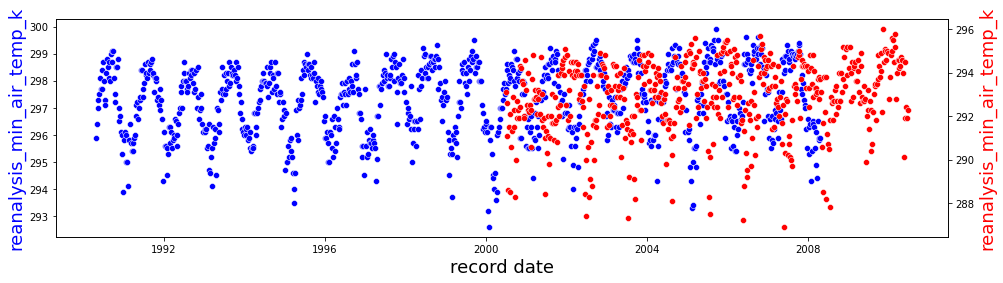

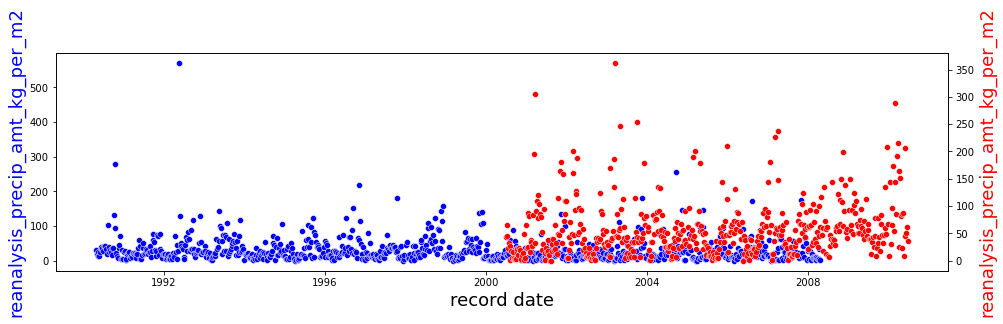

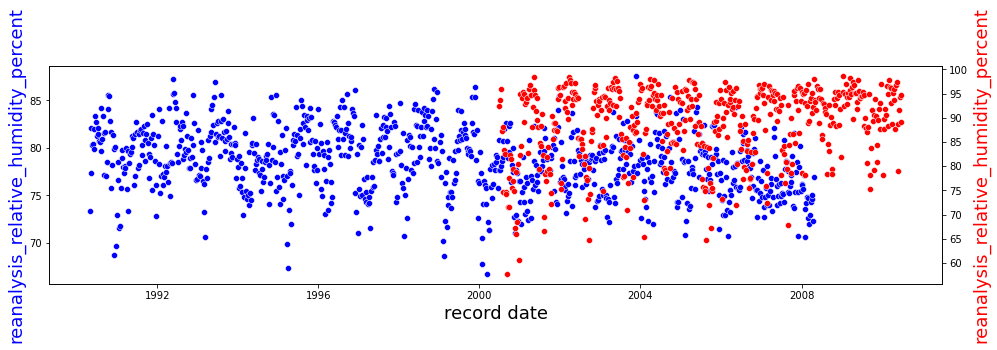

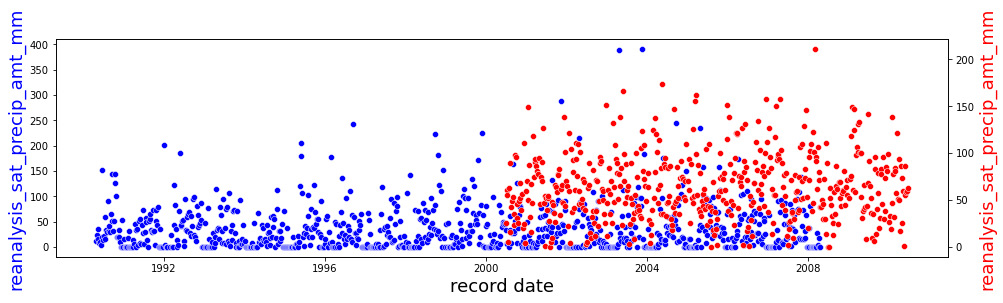

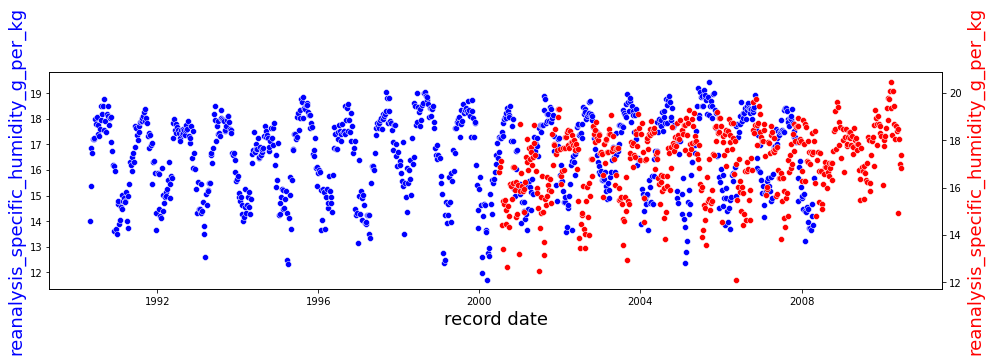

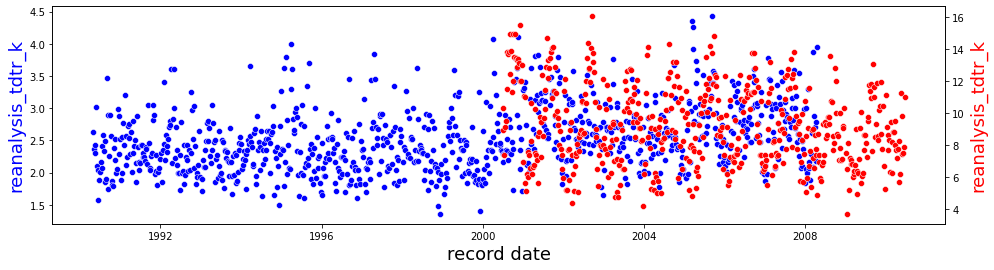

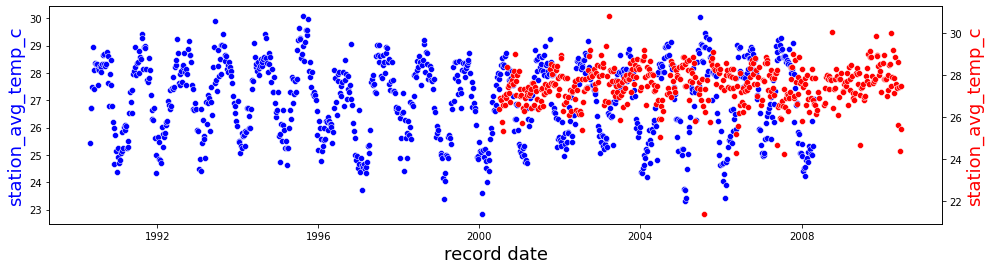

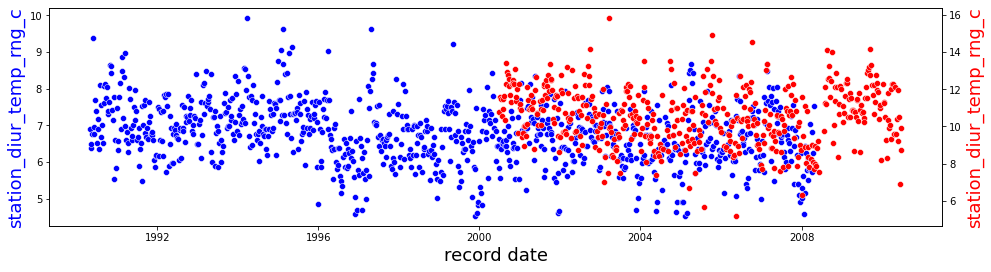

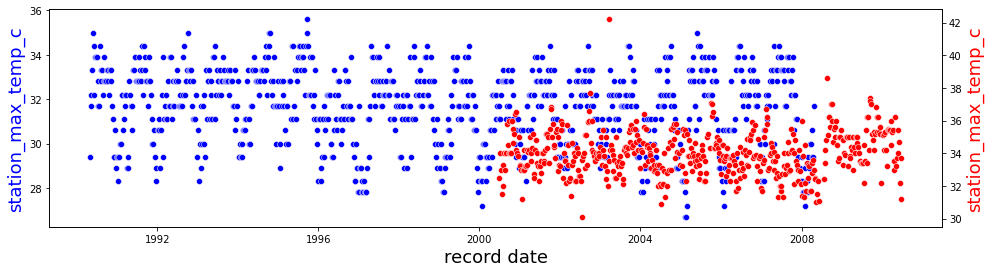

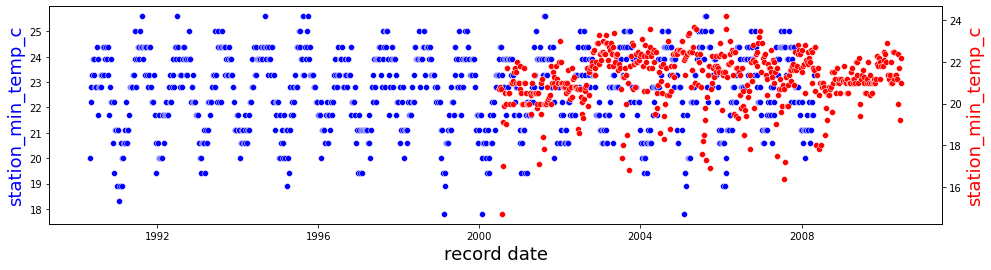

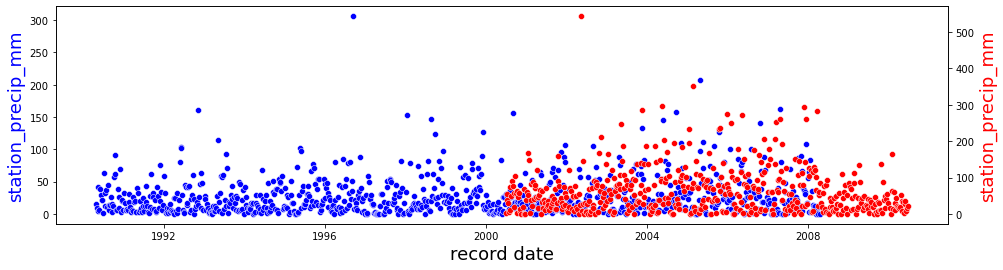

In [80]:
print("Feature value change throughout time in SJ and IQ train data")
for column in train_data_sj.columns[4:]:    
    featurevsfeature_scatter(train_data_sj["week_start_date"], 
                           train_data_sj[column], 
                           train_data_iq["week_start_date"], 
                           train_data_iq[column])

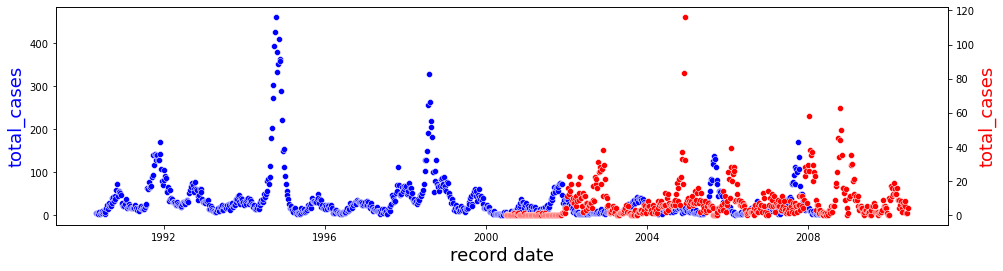

In [146]:
featurevsfeature_scatter(train_data_sj["week_start_date"], 
                         train_label_sj["total_cases"], 
                         train_data_iq["week_start_date"], 
                         train_label_iq["total_cases"])

## Feature Value Distribution

In [132]:
def hist_compare(x1, x2, label_1, label_2, figuresize = (5,5)):
    fig, ax = plt.subplots(ncols = 1, figsize = figuresize)
    sns.histplot(x1, 
                 bins = 20, 
                 stat = "density", 
                 kde = True, 
                 ax = ax, 
                 color = "blue", 
                 label = label_1)
    
    sns.histplot(x2, 
                 bins = 20, 
                 stat = "density", 
                 kde = True, 
                 ax = ax, 
                 color = "orange",
                 label = label_2)
    ax.legend()
    ax.set_title("{} distribution in {} vs {}".format(x1.name, label_1, label_2))
    return

Feature distribution in SJ and IQ train data


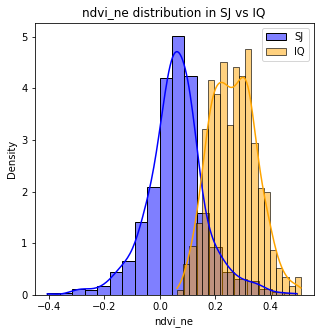

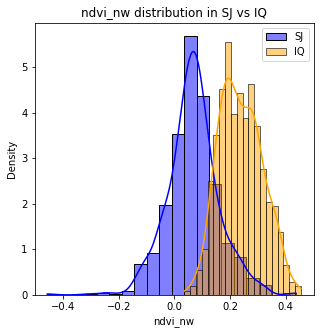

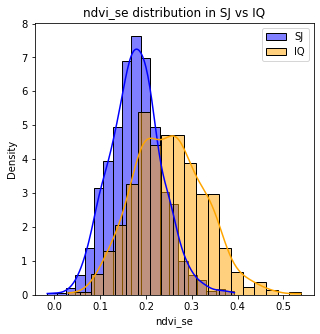

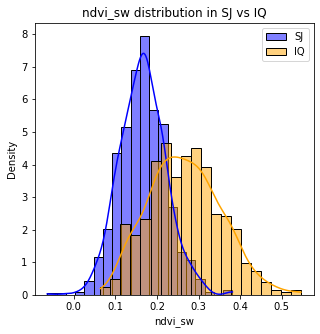

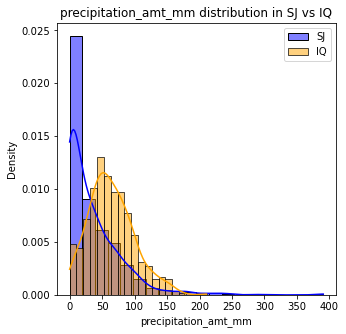

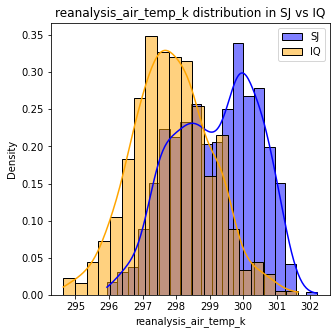

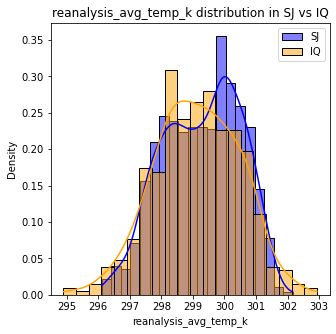

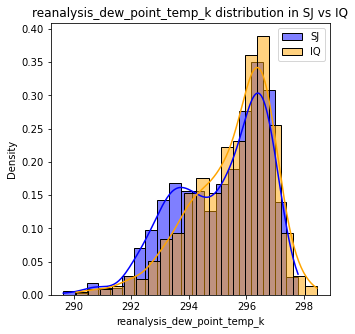

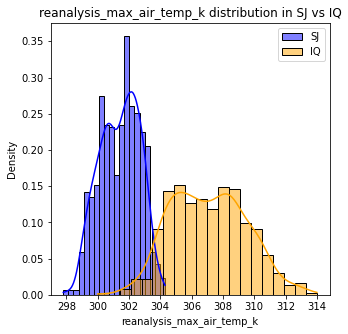

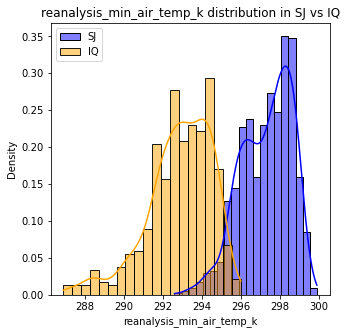

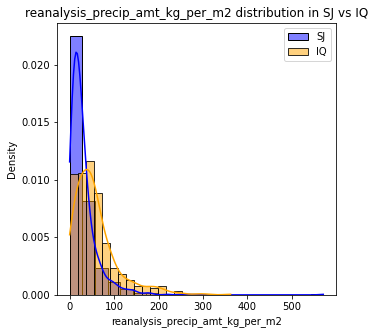

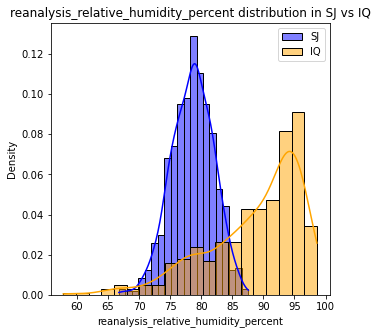

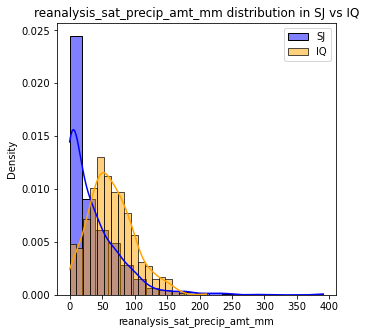

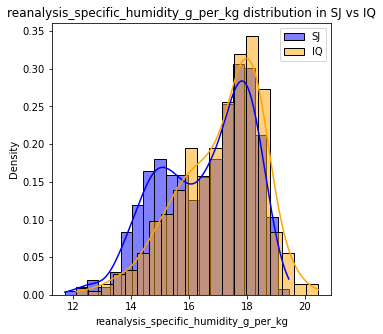

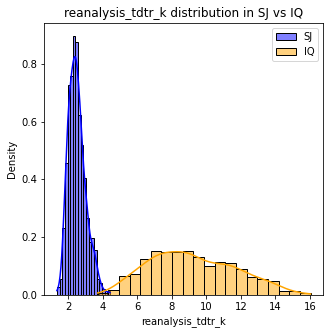

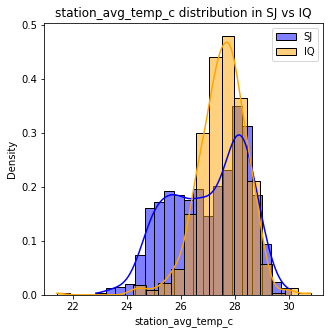

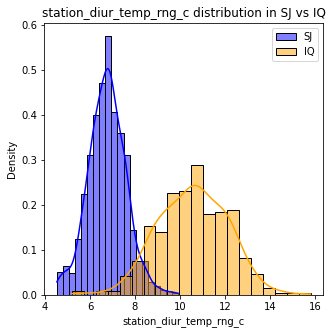

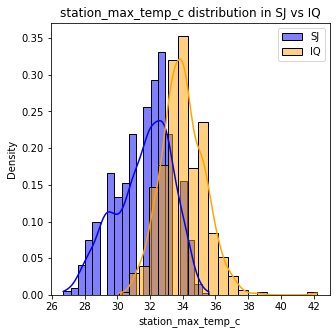

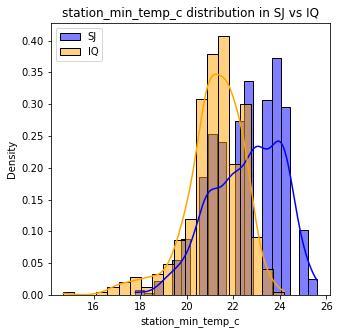

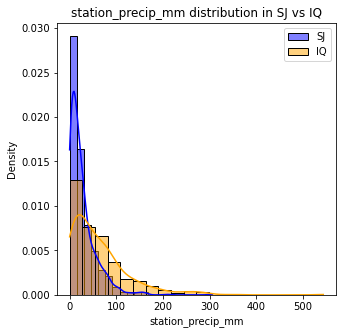

In [133]:
print("Feature distribution in SJ and IQ train data")
for column in train_data_sj.columns[4:]:    
    hist_compare(train_data_sj[column], 
                 train_data_iq[column], 
                 "SJ", 
                 "IQ")

SJ Feature distribution in train vs test


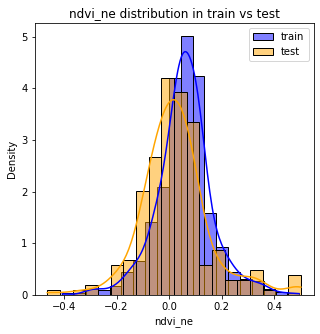

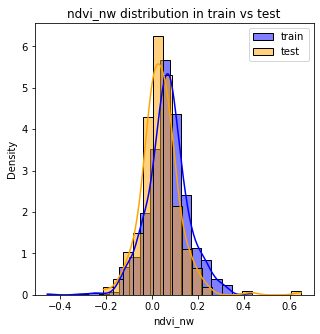

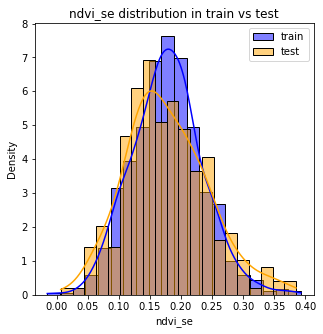

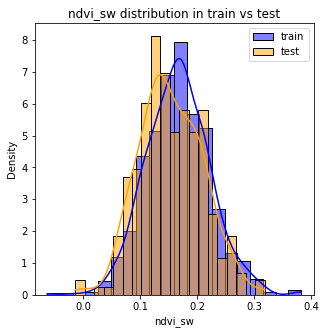

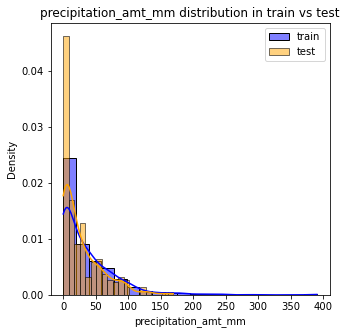

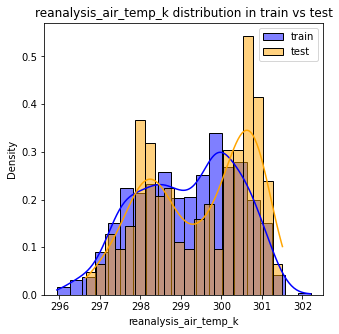

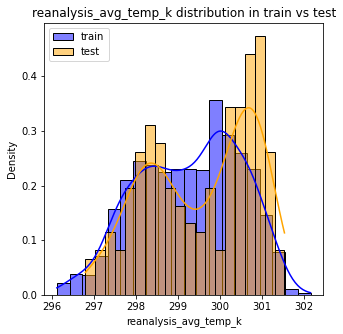

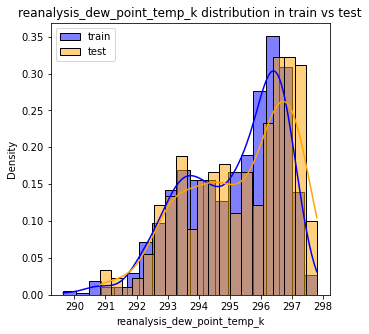

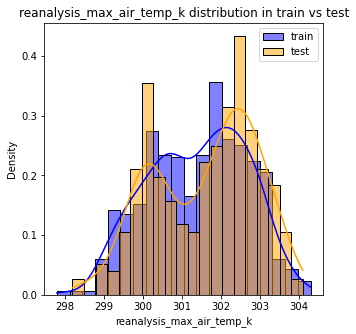

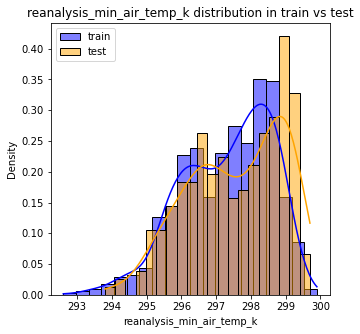

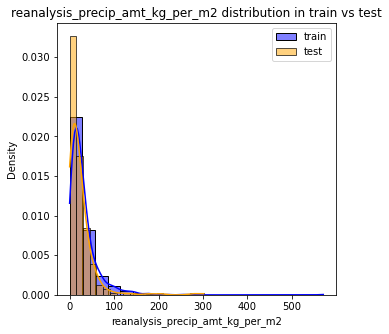

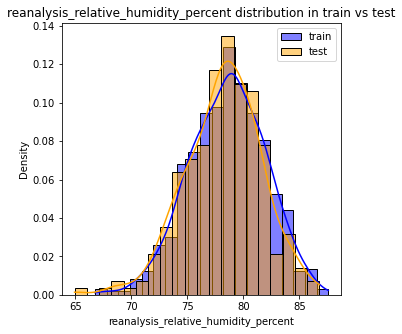

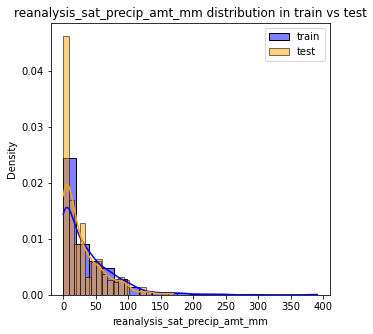

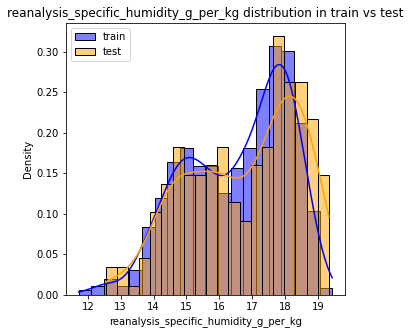

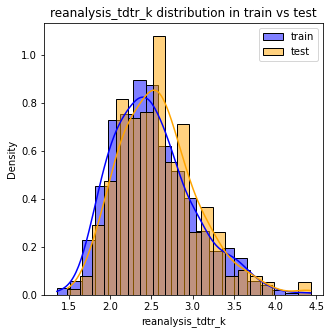

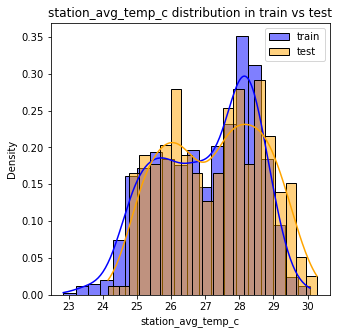

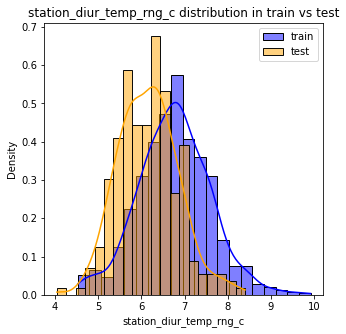

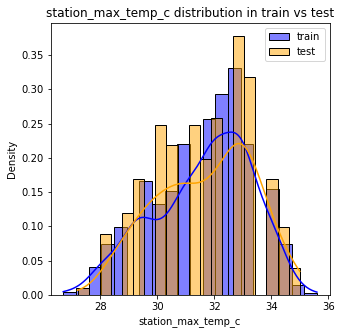

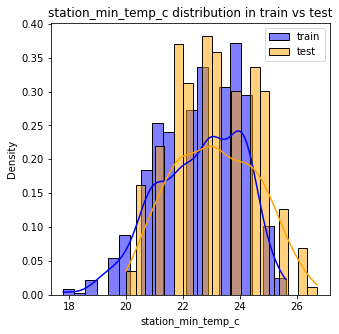

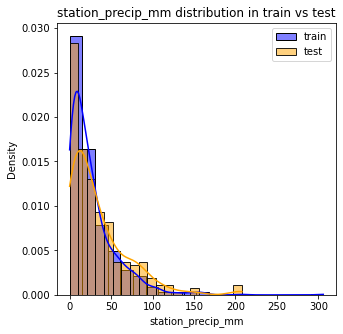

In [134]:
print("SJ Feature distribution in train vs test")
for column in train_data_sj.columns[4:]:    
    hist_compare(train_data_sj[column], 
                 test_data_sj[column], 
                 "train", 
                 "test")

IQ Feature distribution in train vs test


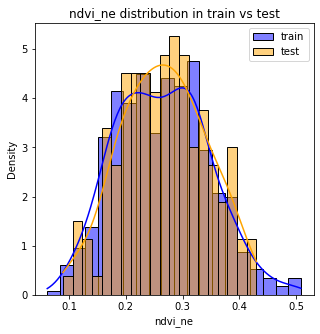

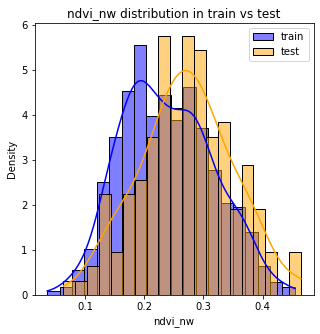

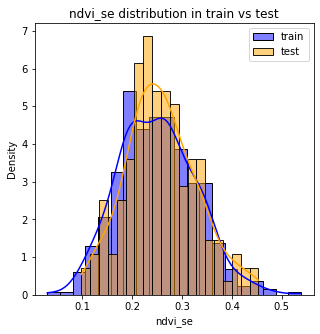

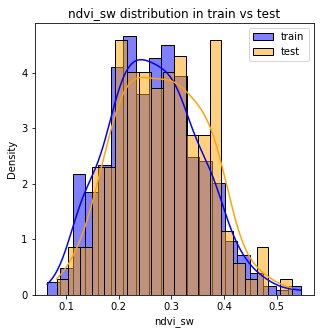

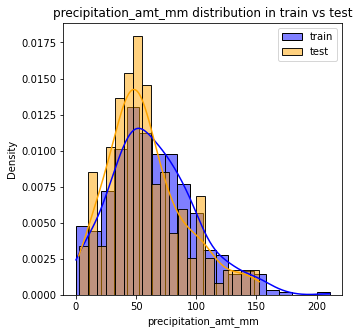

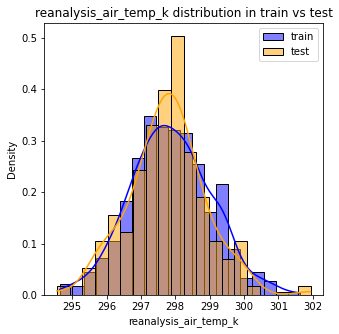

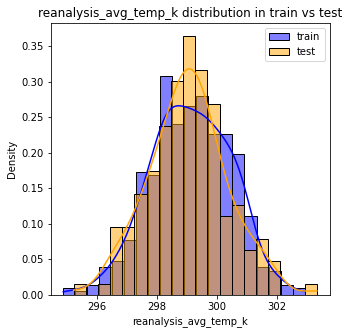

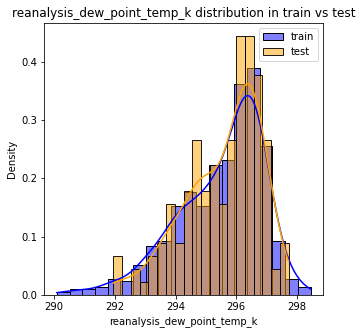

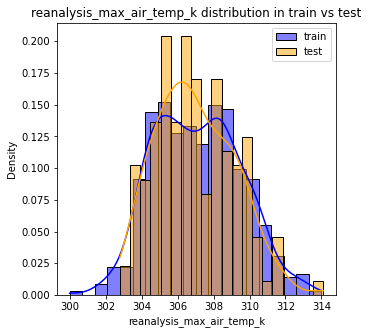

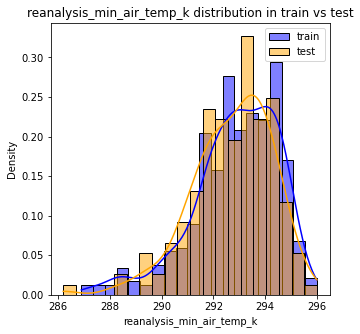

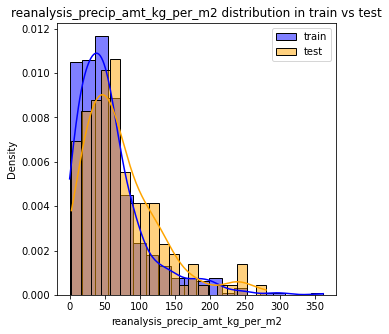

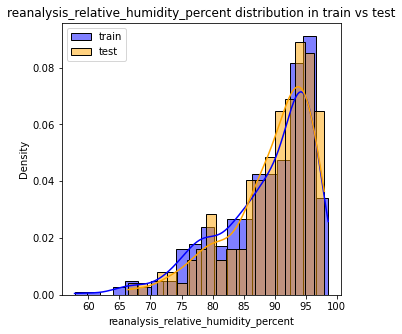

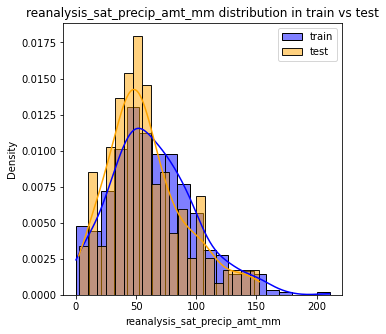

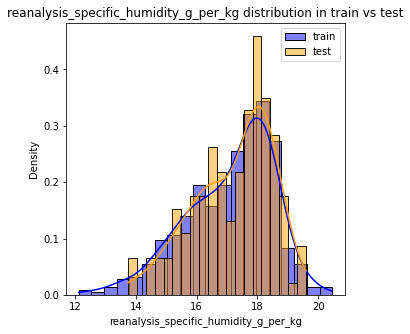

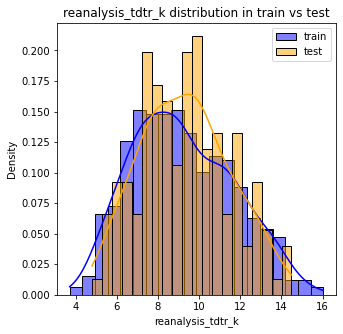

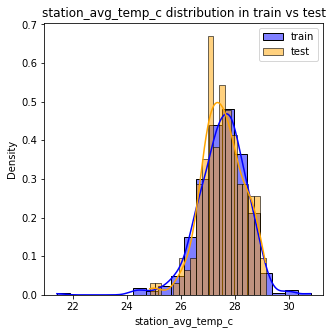

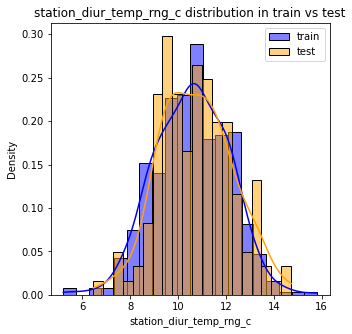

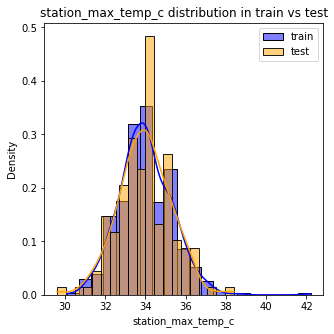

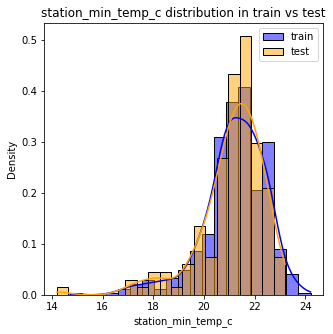

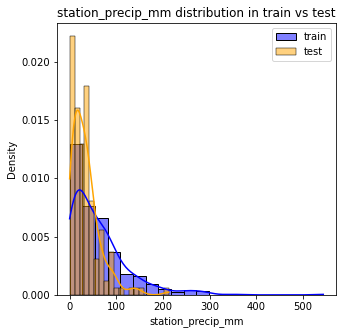

In [135]:
print("IQ Feature distribution in train vs test")
for column in train_data_iq.columns[4:]:    
    hist_compare(train_data_iq[column], 
                 test_data_iq[column], 
                 "train", 
                 "test")

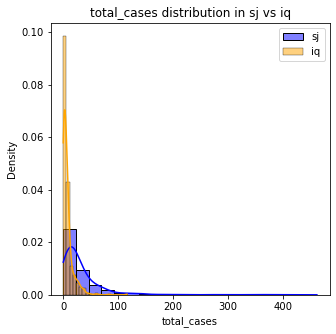

In [148]:
hist_compare(train_label_sj["total_cases"], 
             train_label_iq["total_cases"], 
             "sj", 
             "iq")

In [171]:
# compute the correlations
train_data_sj["total_cases"] = train_label_sj["total_cases"]
sj_train_correlations = train_data_sj.iloc[:,4:].corr()
sj_test_correlations = test_data_sj.iloc[:,4:].corr()
train_data_iq["total_cases"] = train_label_iq["total_cases"]
iq_train_correlations = train_data_iq.iloc[:,4:].corr()
iq_test_correlations = test_data_iq.iloc[:,4:].corr()

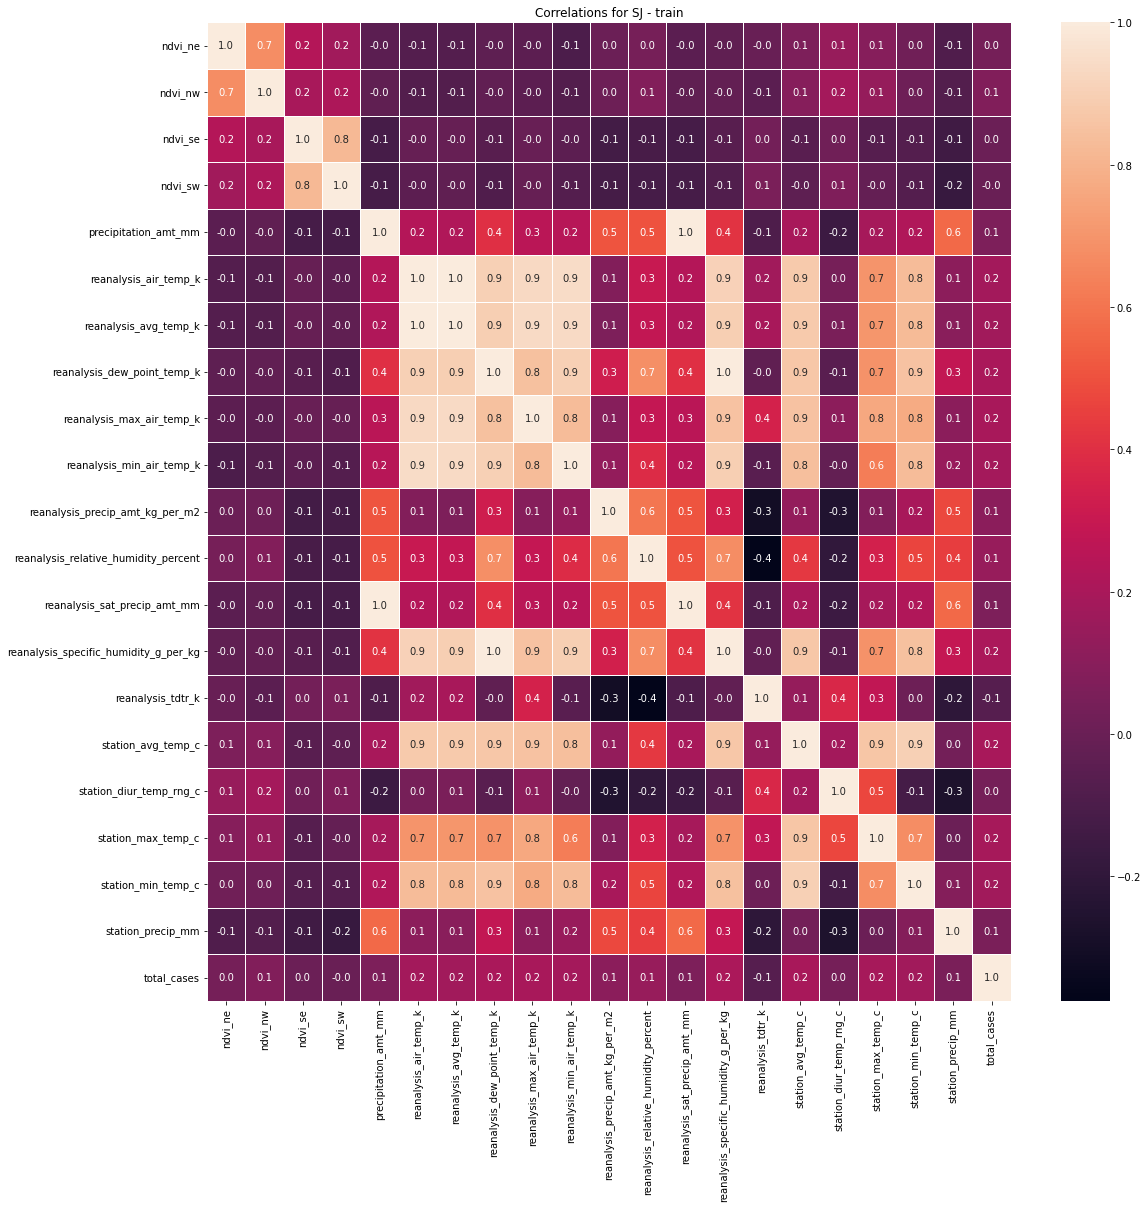

In [172]:
# plot san juan
fig,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(sj_train_correlations, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax.set_title('Correlations for SJ - train')
plt.show()


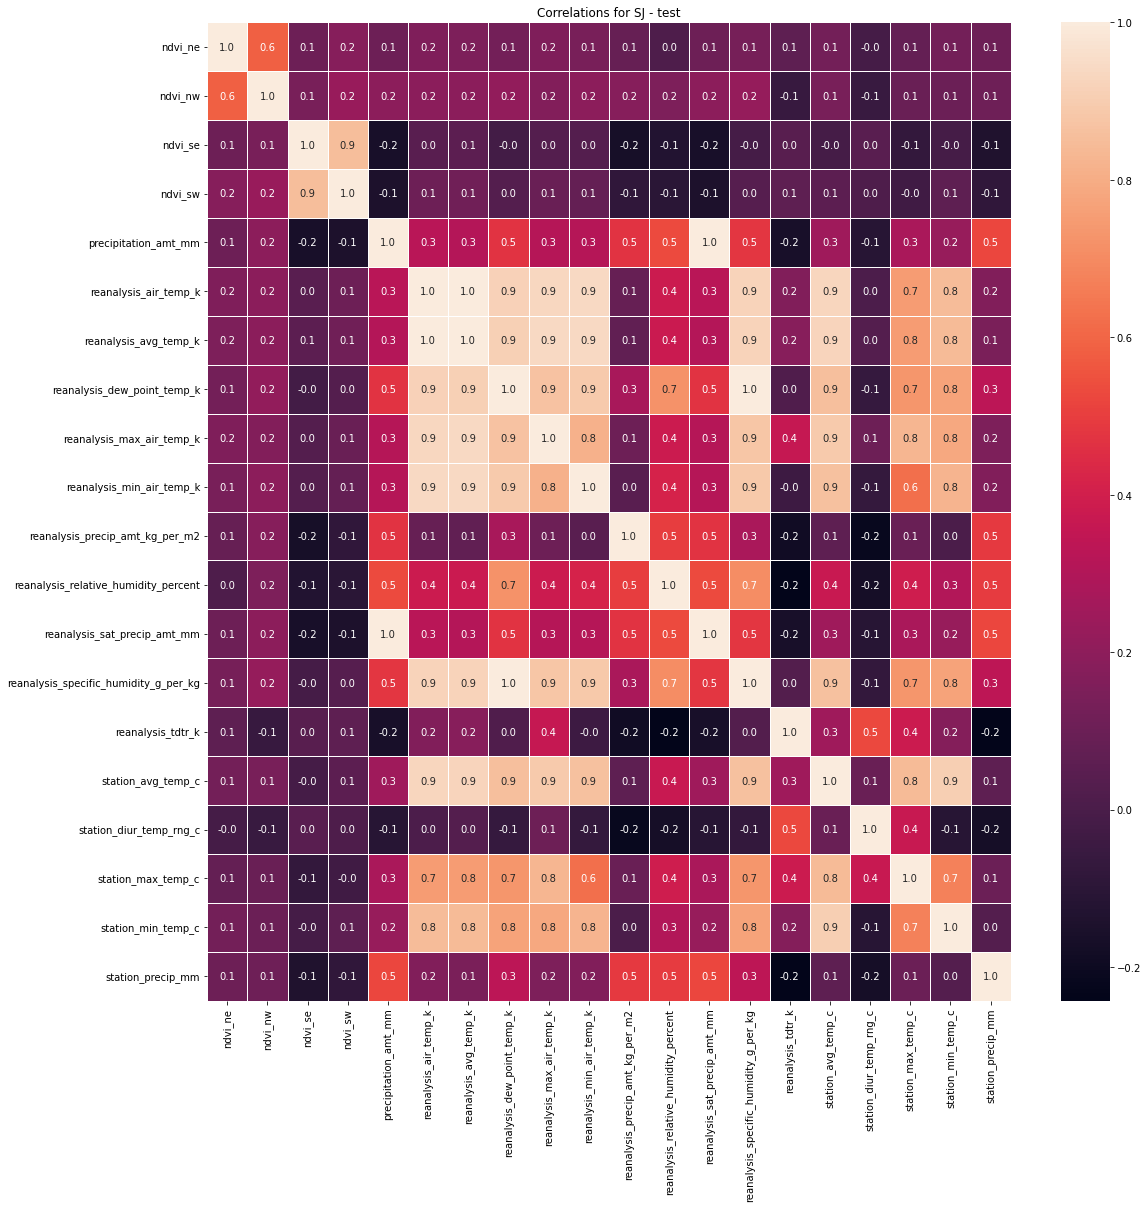

In [169]:
# plot san juan
fig,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(sj_test_correlations, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax.set_title('Correlations for SJ - test')
plt.show()

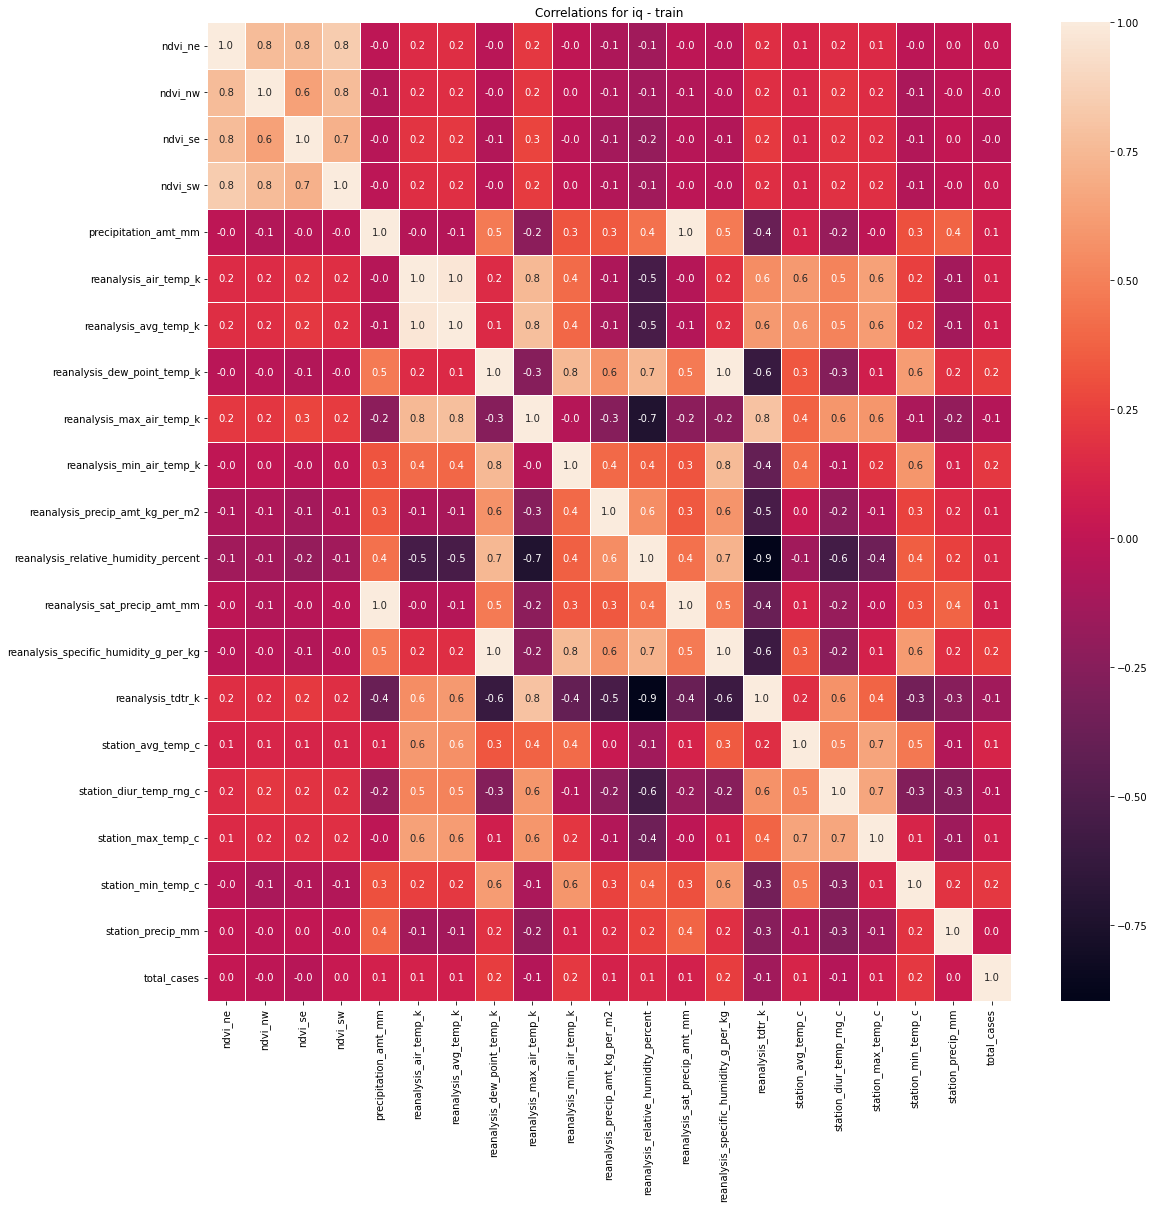

In [174]:
# plot san juan
fig,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(iq_train_correlations, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax.set_title('Correlations for iq - train')
plt.show()

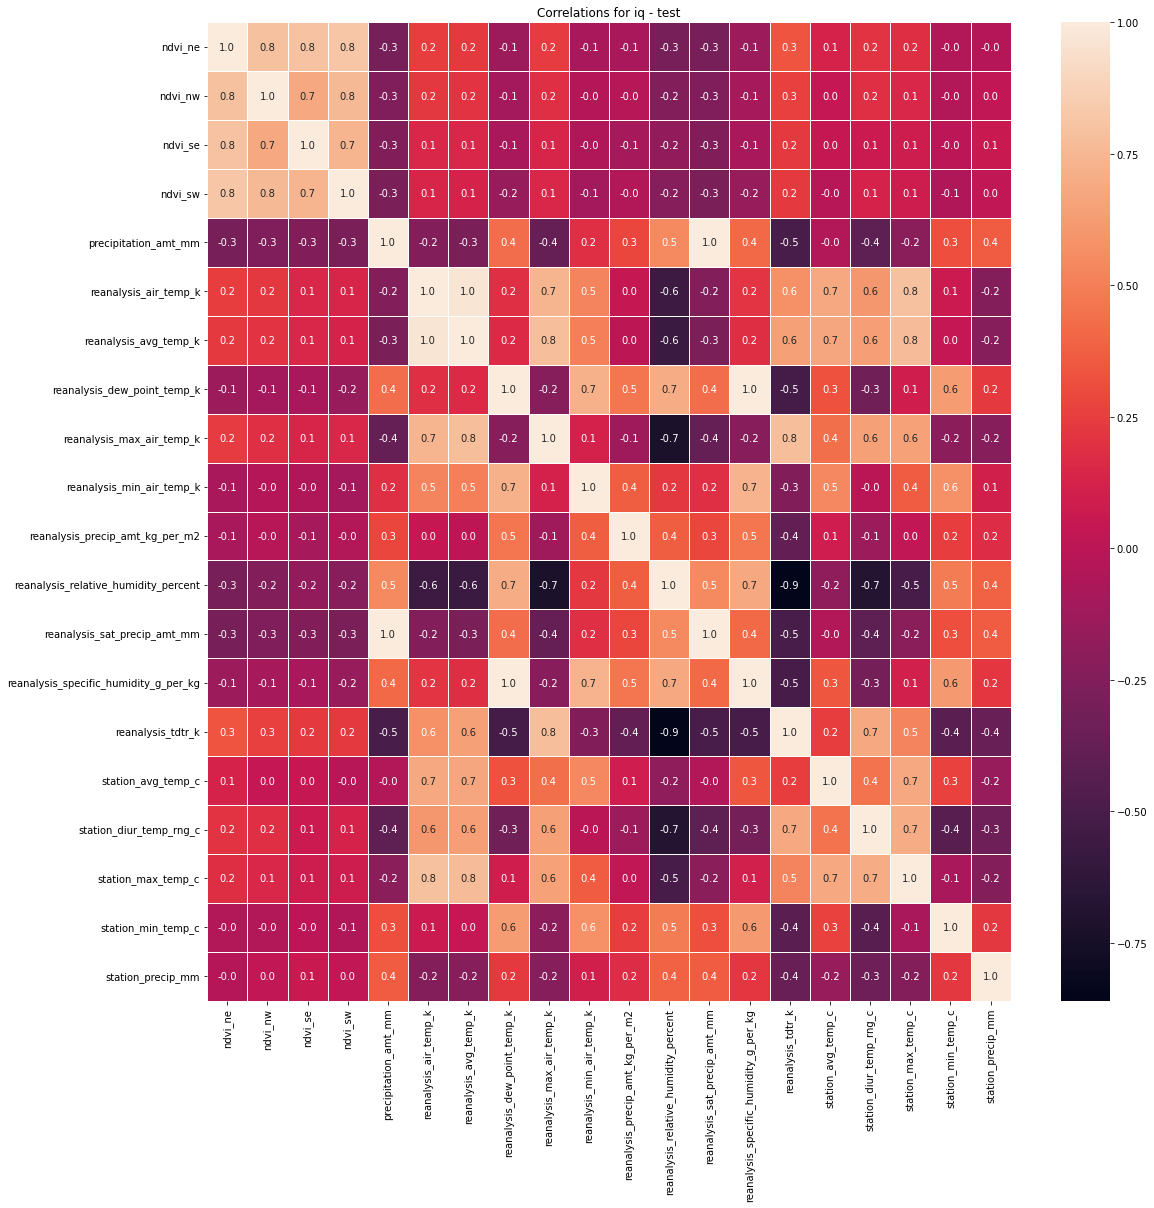

In [175]:
# plot san juan
fig,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(iq_test_correlations, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax.set_title('Correlations for iq - test')
plt.show()

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [39]:
# VIF dataframe
X = train_data_sj.iloc[:,4:]
X = add_constant(X)
X.fillna(method='ffill', inplace=True)
  
# calculating VIF for each feature
vif_df = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
vif_df[vif_df<=5]
    

ndvi_ne                            1.706953
ndvi_nw                            1.770186
ndvi_se                            3.020359
ndvi_sw                            2.983646
reanalysis_precip_amt_kg_per_m2    2.105253
reanalysis_tdtr_k                  3.141359
station_diur_temp_rng_c            3.194337
station_precip_mm                  1.851769
dtype: float64

In [41]:
# VIF dataframe
X = train_data_iq.iloc[:,4:]
X = add_constant(X)
X.fillna(method='ffill', inplace=True)
  
# calculating VIF for each feature
vif_df = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
vif_df[vif_df<=5]
    

ndvi_ne                            4.815962
ndvi_nw                            2.880358
ndvi_se                            2.648140
ndvi_sw                            4.074413
reanalysis_precip_amt_kg_per_m2    1.882896
station_avg_temp_c                 3.100993
station_diur_temp_rng_c            3.209504
station_max_temp_c                 2.970529
station_min_temp_c                 2.626922
station_precip_mm                  1.236832
dtype: float64